In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


### Deeper exploration of features
1. Explore the population trends
2. Explore the 2021 - decay
3. Add extra features per column:
    - Unemployment
    - Internet Con
    - Uni educ
    - Calculate population from : (Active/Pop) *100 = Microbusiness

In [65]:
df = pd.read_csv("../data/processed/county_data.csv")

In [66]:
df.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,STNAME,CTYNAME,POPESTIMATE2020,POPESTIMATE2021,year,population,quarter,pop_group_2020,pop_group_2022
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,Alabama,Autauga County,58877,59095,2019,41526,3,medium,medium
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198,Alabama,Autauga County,58877,59095,2019,41526,3,medium,medium
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269,Alabama,Autauga County,58877,59095,2019,41527,4,medium,medium
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243,Alabama,Autauga County,58877,59095,2019,41527,4,medium,medium
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243,Alabama,Autauga County,58877,59095,2019,41527,4,medium,medium


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122265 entries, 0 to 122264
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   row_id                 122265 non-null  object 
 1   cfips                  122265 non-null  int64  
 2   county                 122265 non-null  object 
 3   state                  122265 non-null  object 
 4   first_day_of_month     122265 non-null  object 
 5   microbusiness_density  122265 non-null  float64
 6   active                 122265 non-null  int64  
 7   STNAME                 122265 non-null  object 
 8   CTYNAME                122265 non-null  object 
 9   POPESTIMATE2020        122265 non-null  int64  
 10  POPESTIMATE2021        122265 non-null  int64  
 11  year                   122265 non-null  int64  
 12  population             122265 non-null  int64  
 13  quarter                122265 non-null  int64  
 14  pop_group_2020         122265 non-nu

In [68]:
df["first_day_of_month"] = pd.to_datetime(df["first_day_of_month"])

In [69]:
df.isna().sum()

row_id                   0
cfips                    0
county                   0
state                    0
first_day_of_month       0
microbusiness_density    0
active                   0
STNAME                   0
CTYNAME                  0
POPESTIMATE2020          0
POPESTIMATE2021          0
year                     0
population               0
quarter                  0
pop_group_2020           0
pop_group_2022           0
dtype: int64

Text(0.5, 1.0, 'Bottom 10 Counties by Population')

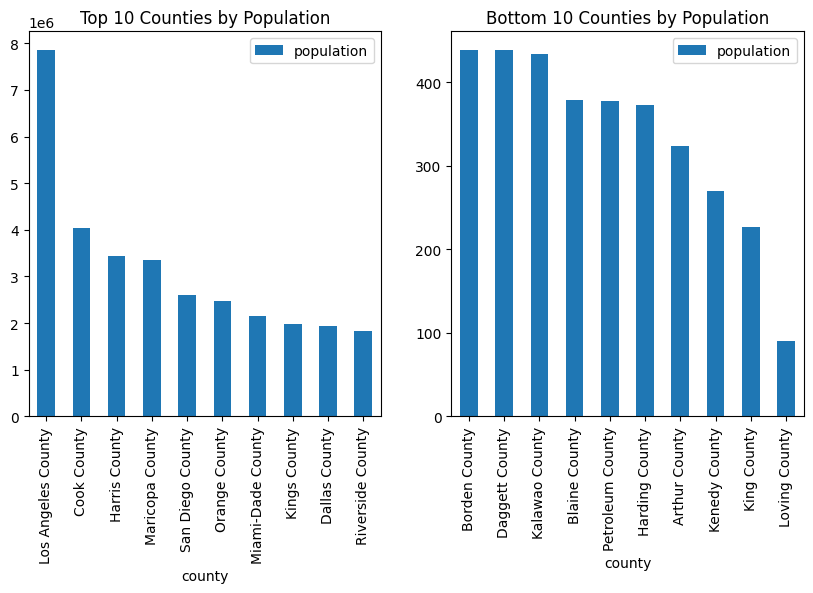

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df[df["first_day_of_month"] == df["first_day_of_month"].max()].sort_values(
    by="population", ascending=False
).head(10)[["county", "population"]].plot(
    kind="bar", x="county", y="population", ax=ax[0]
)
df[df["first_day_of_month"] == df["first_day_of_month"].max()].sort_values(
    by="population", ascending=False
).tail(10)[["county", "population"]].plot(
    kind="bar", x="county", y="population", ax=ax[1]
)
ax[0].set_title("Top 10 Counties by Population")
ax[1].set_title("Bottom 10 Counties by Population")

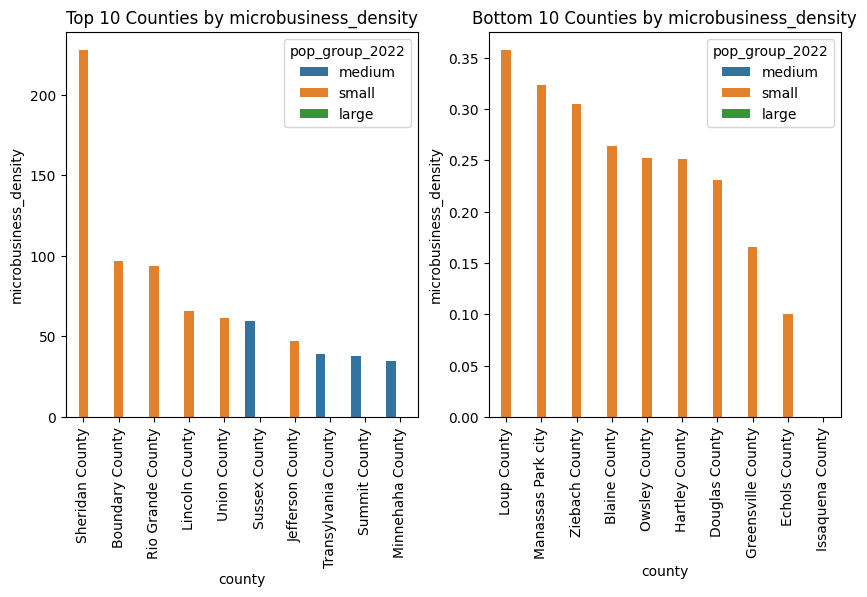

In [71]:
# plot the same as above but with sns
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(
    data=df[df["first_day_of_month"] == df["first_day_of_month"].max()]
    .sort_values(by="microbusiness_density", ascending=False)
    .head(10),
    x="county",
    y="microbusiness_density",
    hue=df["pop_group_2022"],
    ax=ax[0],
)
sns.barplot(
    data=df[df["first_day_of_month"] == df["first_day_of_month"].max()]
    .sort_values(by="microbusiness_density", ascending=False)
    .tail(10),
    x="county",
    y="microbusiness_density",
    # set hue as df["pop_group_2022"]
    hue=df["pop_group_2022"],
    ax=ax[1],
)
ax[0].set_title("Top 10 Counties by microbusiness_density")
ax[1].set_title("Bottom 10 Counties by microbusiness_density")
# set xticks vertical
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [72]:
# Counties with microbusiness density = 0
print(df[df["microbusiness_density"] == 0]["cfips"].unique())
df[df["cfips"] == 46127]

[28055 48301]


,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,STNAME,CTYNAME,POPESTIMATE2020,POPESTIMATE2021,year,population,quarter,pop_group_2020,pop_group_2022
94380,46127_2019-08-01,46127,Union County,South Dakota,2019-08-01,277.535980,31245,South Dakota,Union County,16832,16872,2019,11257,3,small,small
94381,46127_2019-09-01,46127,Union County,South Dakota,2019-09-01,5.880263,662,South Dakota,Union County,16832,16872,2019,11258,3,small,small
94382,46127_2019-10-01,46127,Union County,South Dakota,2019-10-01,284.340030,32011,South Dakota,Union County,16832,16872,2019,11257,4,small,small
94383,46127_2019-11-01,46127,Union County,South Dakota,2019-11-01,5.871380,661,South Dakota,Union County,16832,16872,2019,11258,4,small,small
94384,46127_2019-12-01,46127,Union County,South Dakota,2019-12-01,5.862498,660,South Dakota,Union County,16832,16872,2019,11257,4,small,small
94385,46127_2020-01-01,46127,Union County,South Dakota,2020-01-01,5.733148,660,South Dakota,Union County,16832,16872,2020,11511,1,small,small
94386,46127_2020-02-01,46127,Union County,South Dakota,2020-02-01,5.542043,638,South Dakota,Union County,16832,16872,2020,11511,1,small,small
94387,46127_2020-03-01,46127,Union County,South Dakota,2020-03-01,5.437804,626,South Dakota,Union County,16832,16872,2020,11511,1,small,small
94388,46127_2020-04-01,46127,Union County,South Dakota,2020-04-01,5.724462,659,South Dakota,Union County,16832,16872,2020,11511,2,small,small
94389,46127_2020-05-01,46127,Union County,South Dakota,2020-05-01,5.759208,663,South Dakota,Union County,16832,16872,2020,11512,2,small,small


### Reflection
It makes sense that the smallest and largest mb_density are in the smallest counties, as it is easier for them to fluctuate. With large populations in counties you would have to have extreme values of active mb to be on top or lowest

## Time series
Look at evolution over the months of some samples

### Plot the values, the rolling mean and rolling standard deviation, window = 5

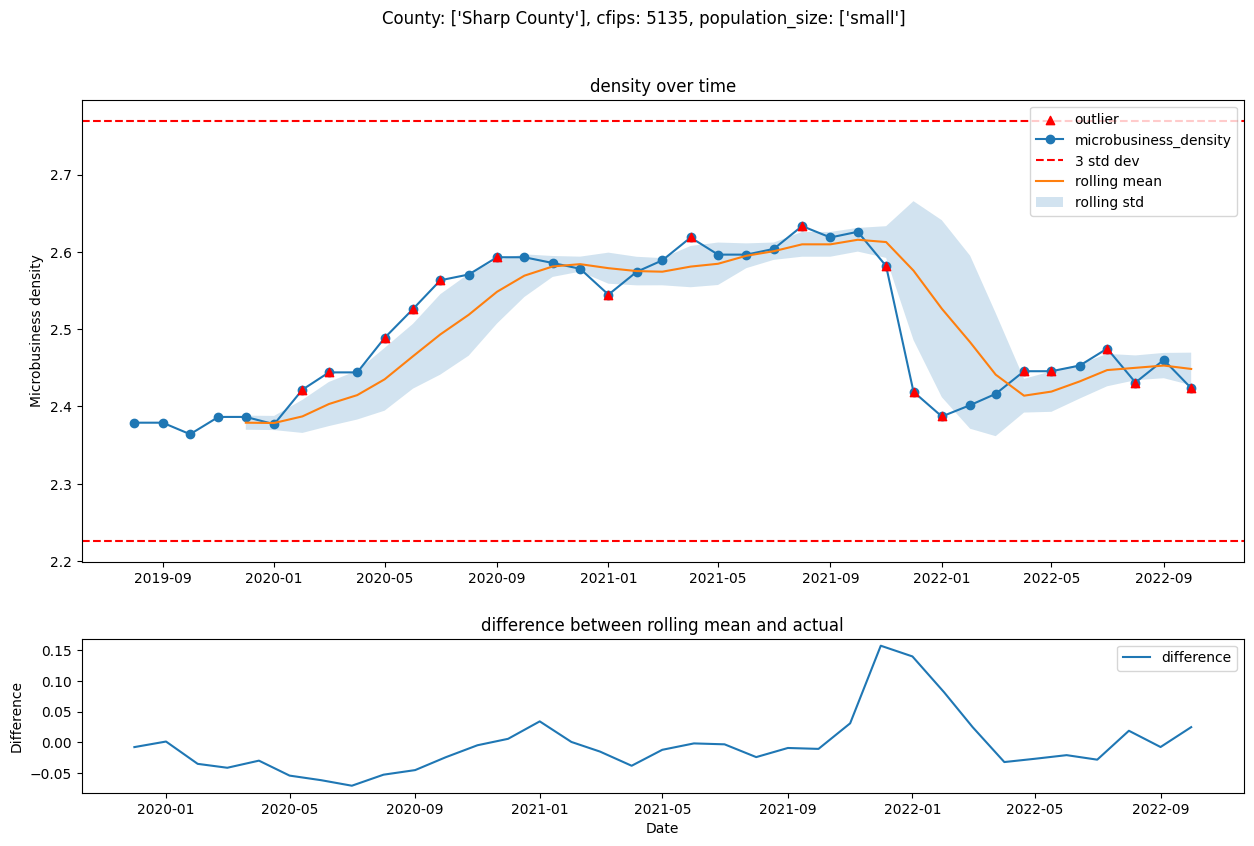

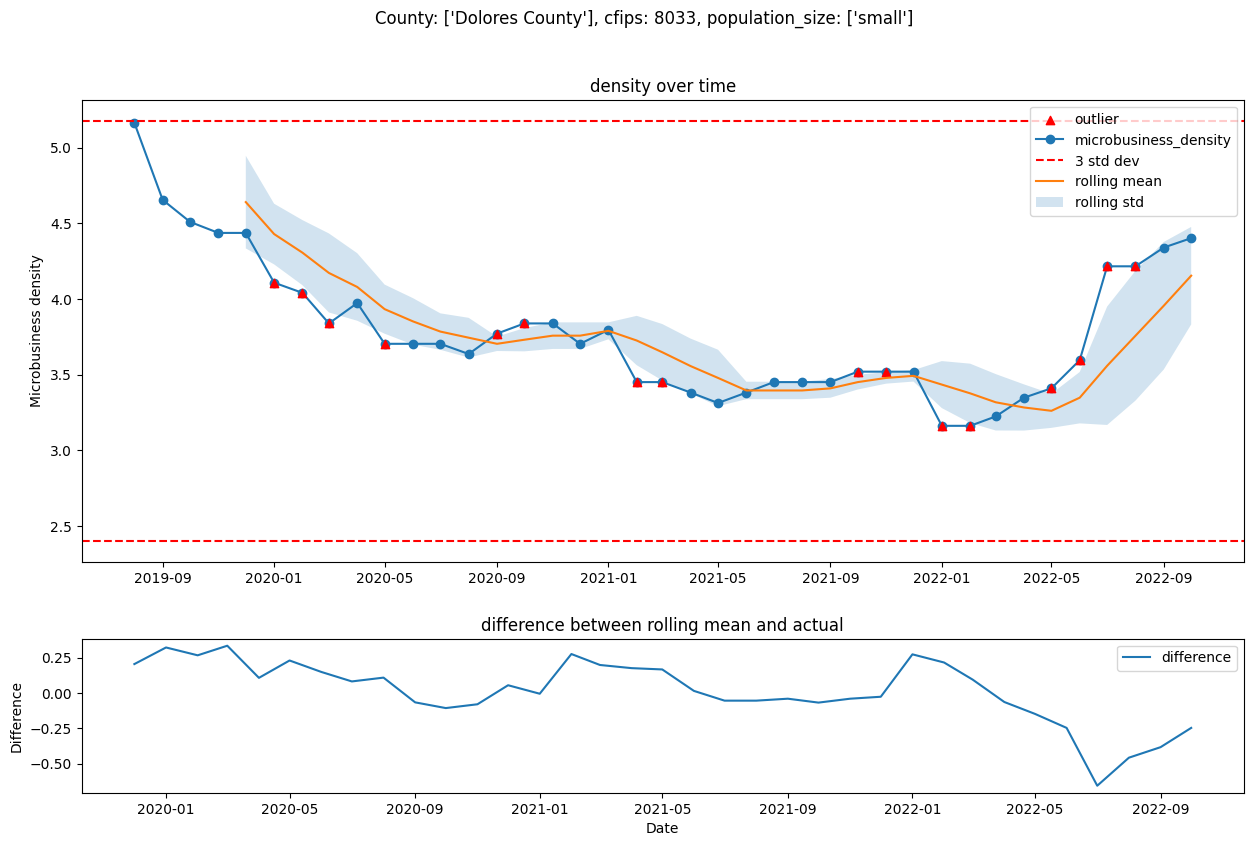

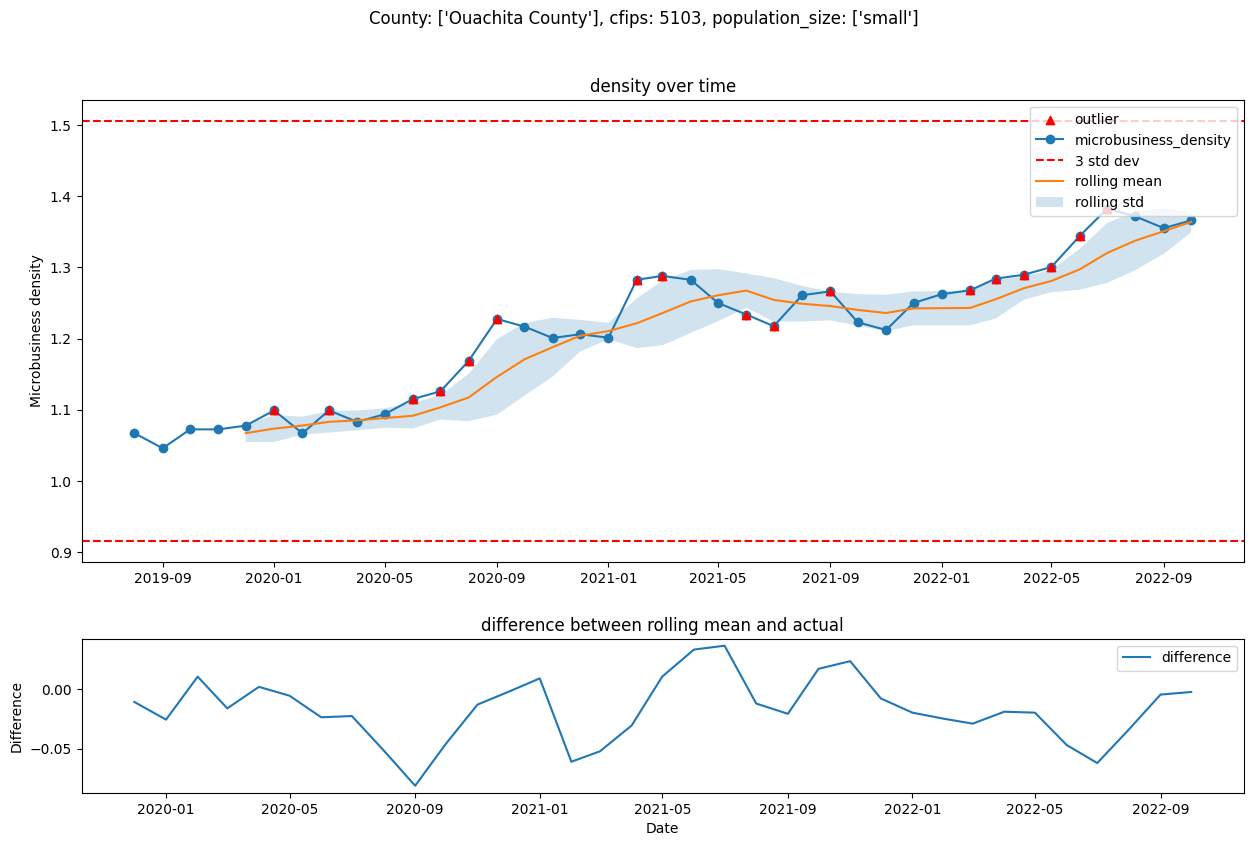

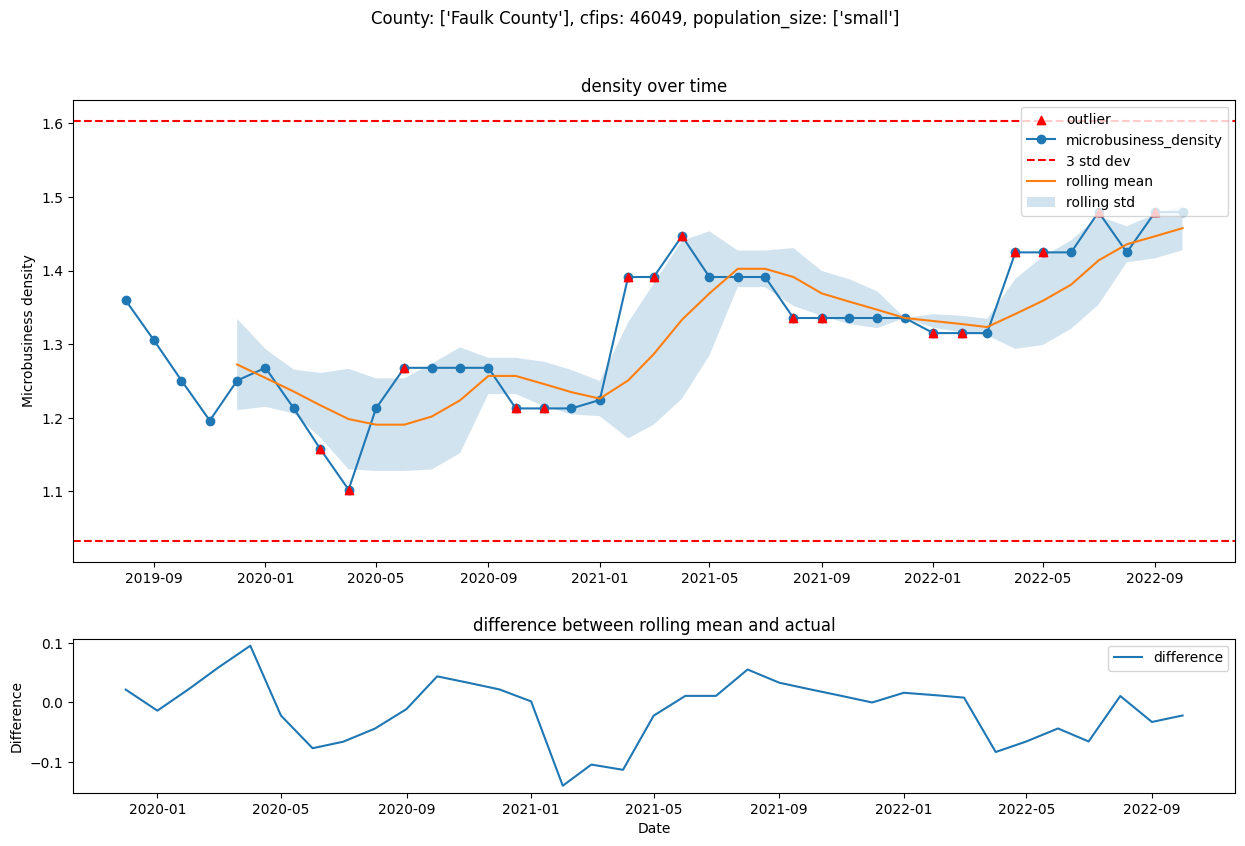

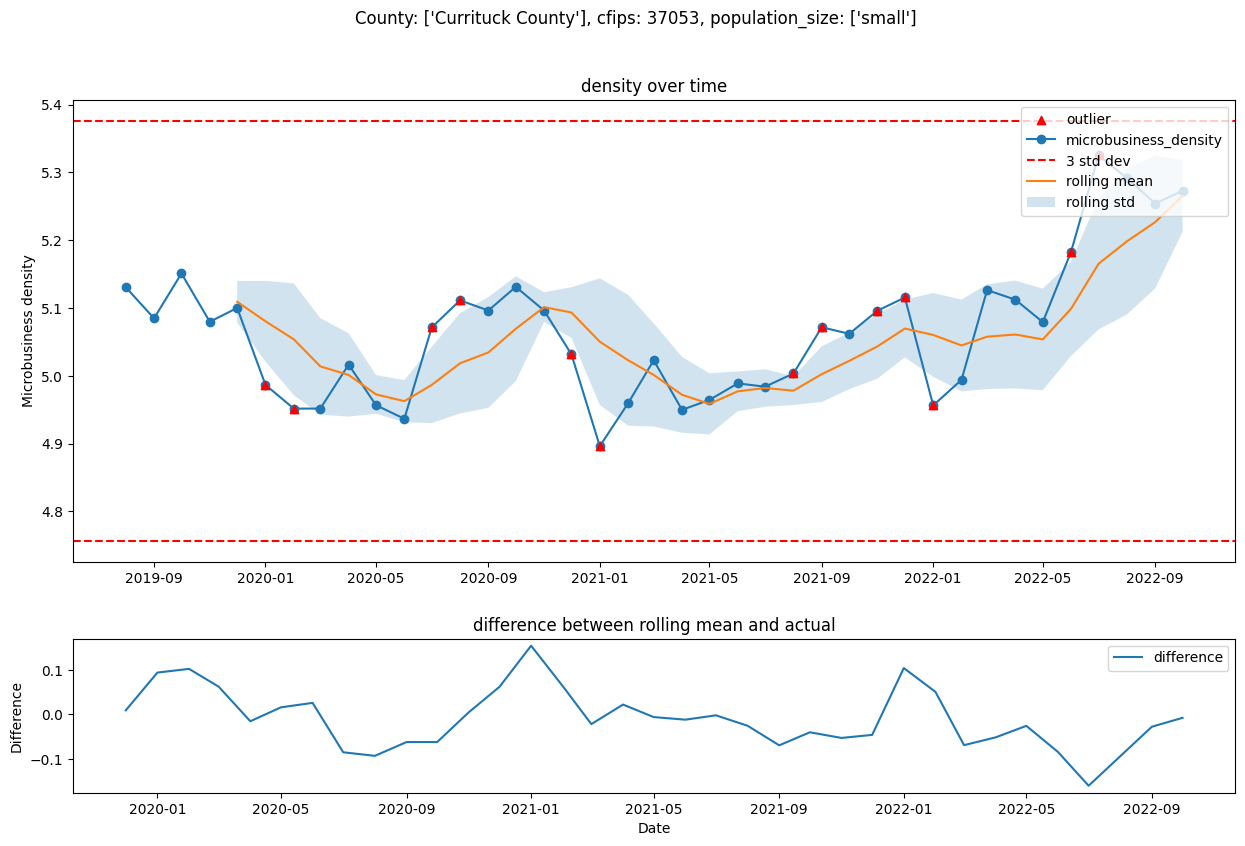

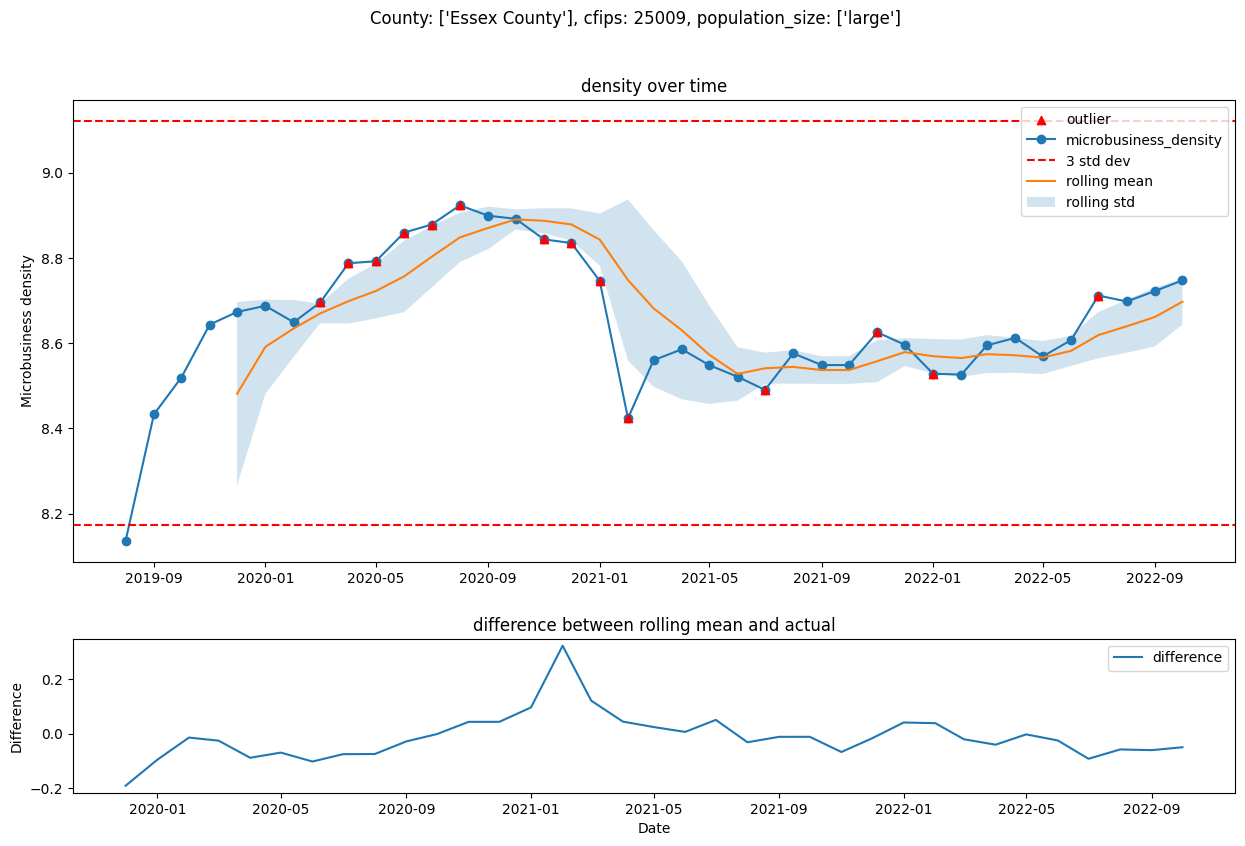

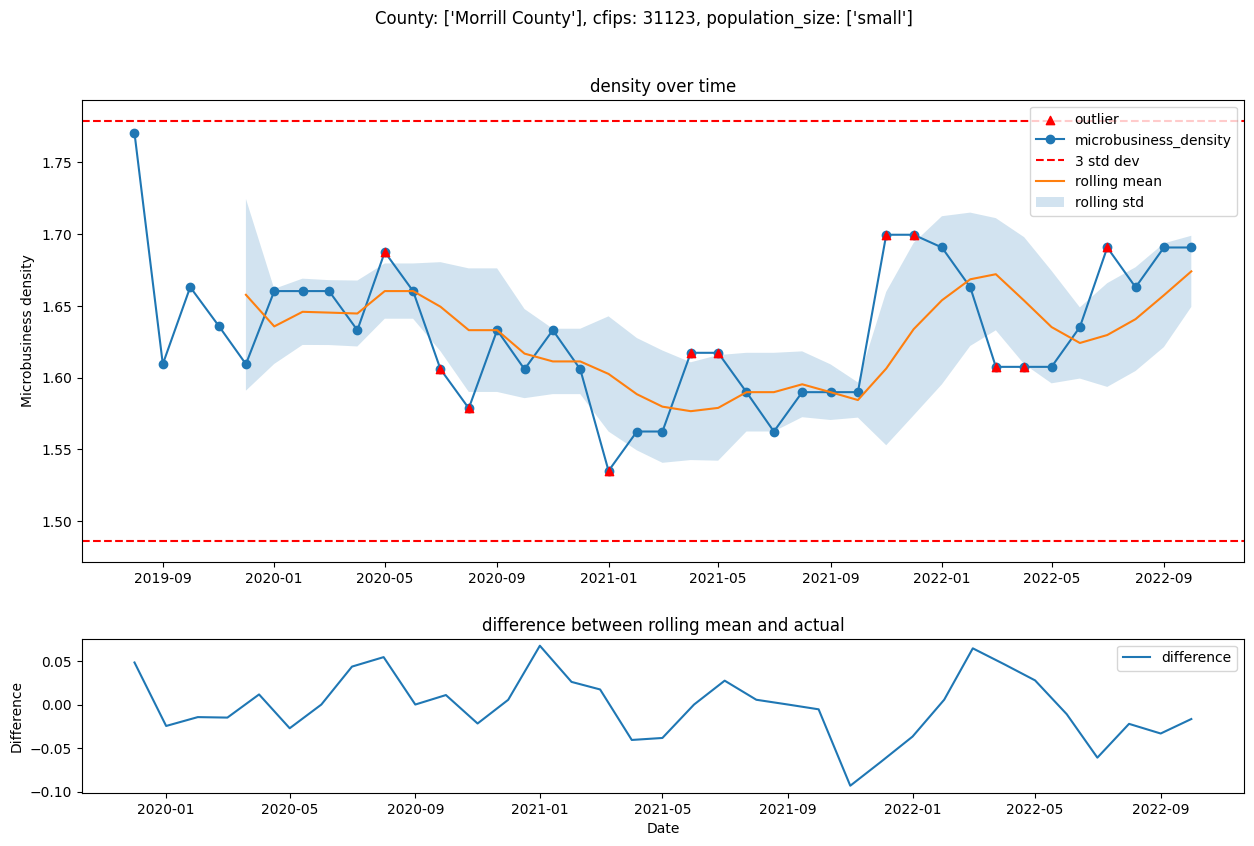

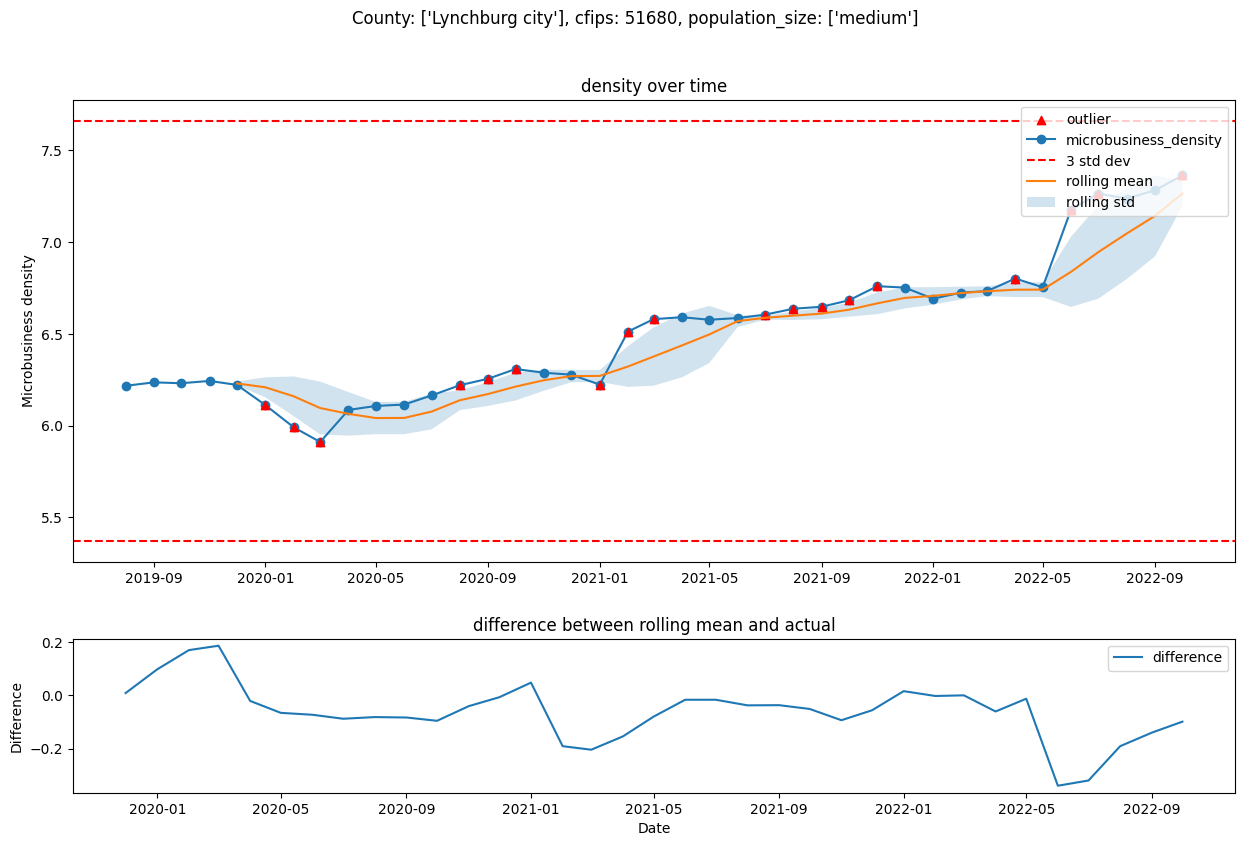

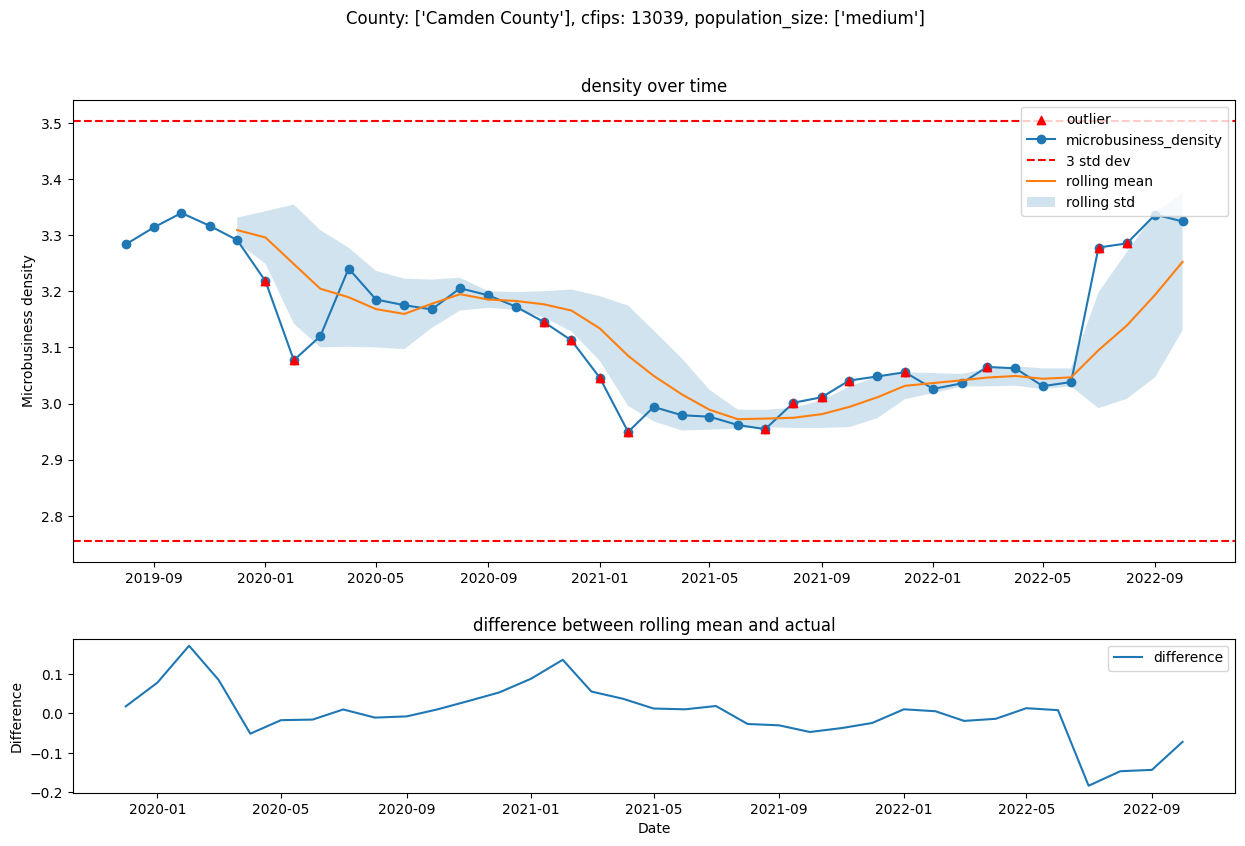

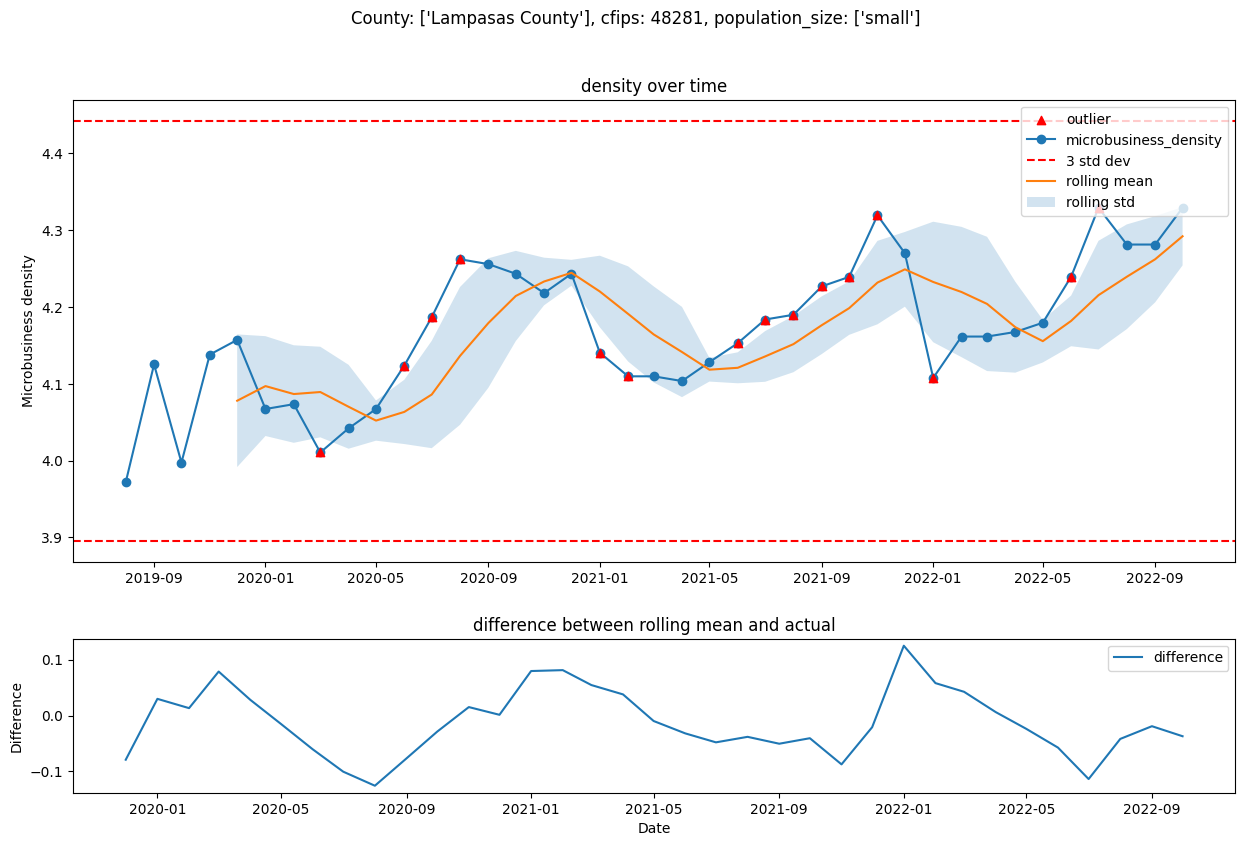

In [73]:
cfips = df["cfips"].unique()
window = 5

for i in range(10):
    # Choose a random county
    c = np.random.choice(cfips)
    temp_df = df[df["cfips"] == c]

    # create an outlier mask
    outlier_mask = (
        temp_df["microbusiness_density"]
        < temp_df["microbusiness_density"].rolling(window=window).mean()
        - temp_df["microbusiness_density"].rolling(window=window).std()
    ) | (
        temp_df["microbusiness_density"]
        > temp_df["microbusiness_density"].rolling(window=window).mean()
        + temp_df["microbusiness_density"].rolling(window=window).std()
    )

    # Plot the value of the microdensity over time
    fig, axs = plt.subplots(
        2, 1, gridspec_kw={"height_ratios": [3, 1]}, figsize=(15, 9)
    )
    axs[0].scatter(
        temp_df["first_day_of_month"][outlier_mask],
        temp_df["microbusiness_density"][outlier_mask],
        color="red",
        marker="^",
        label="outlier",
        zorder=2,
    )
    axs[0].plot(
        temp_df["first_day_of_month"],
        temp_df["microbusiness_density"],
        "-o",
        label="microbusiness_density",
        zorder=1,
    )
    axs[0].set_title(f"density over time")
    axs[0].set_ylabel("Microbusiness density")
    # plot 2 vertical lines, one is 3 standard devs above the mean, the other is 3 standard devs below the mean
    axs[0].axhline(
        temp_df["microbusiness_density"].mean()
        + 3 * temp_df["microbusiness_density"].std(),
        color="red",
        linestyle="--",
        label="3 std dev",
    )
    axs[0].axhline(
        temp_df["microbusiness_density"].mean()
        - 3 * temp_df["microbusiness_density"].std(),
        color="red",
        linestyle="--",
    )

    # plot the rolling mean (window=window)
    axs[0].plot(
        temp_df["first_day_of_month"],
        temp_df["microbusiness_density"].rolling(window=window).mean(),
        label="rolling mean",
    )
    axs[0].fill_between(
        temp_df["first_day_of_month"],
        temp_df["microbusiness_density"].rolling(window=window).mean()
        - temp_df["microbusiness_density"].rolling(window=window).std(),
        temp_df["microbusiness_density"].rolling(window=window).mean()
        + temp_df["microbusiness_density"].rolling(window=window).std(),
        alpha=0.2,
        label="rolling std",
    )

    axs[0].legend()
    # plot a second figure below that is the absolut value of the difference between the two

    axs[1].plot(
        temp_df["first_day_of_month"],
        temp_df["microbusiness_density"].rolling(window=window).mean()
        - temp_df["microbusiness_density"],
        label="difference",
    )
    axs[1].set_title(f"difference between rolling mean and actual")

    # axs[1].set_xticks(,rotation=90)
    axs[1].set_ylabel("Difference")
    axs[1].set_xlabel("Date")

    # set labels for the legend
    axs[0].legend(loc="upper right")
    axs[1].legend()
    # add padding between both graphs
    plt.subplots_adjust(hspace=0.25)
    plt.suptitle(
        f"County: {temp_df['county'].unique()}, cfips: {c}, population_size: {temp_df['pop_group_2022'].unique()}"
    )
    plt.show()

### Reflection
It is clear that our data has a high level of variability or skewness for our 5 window rolling stdev. We could smoothen our dataset with a rolling mean for example or with lowess

### Smoothen the curves

In [74]:
import statsmodels.api as sm

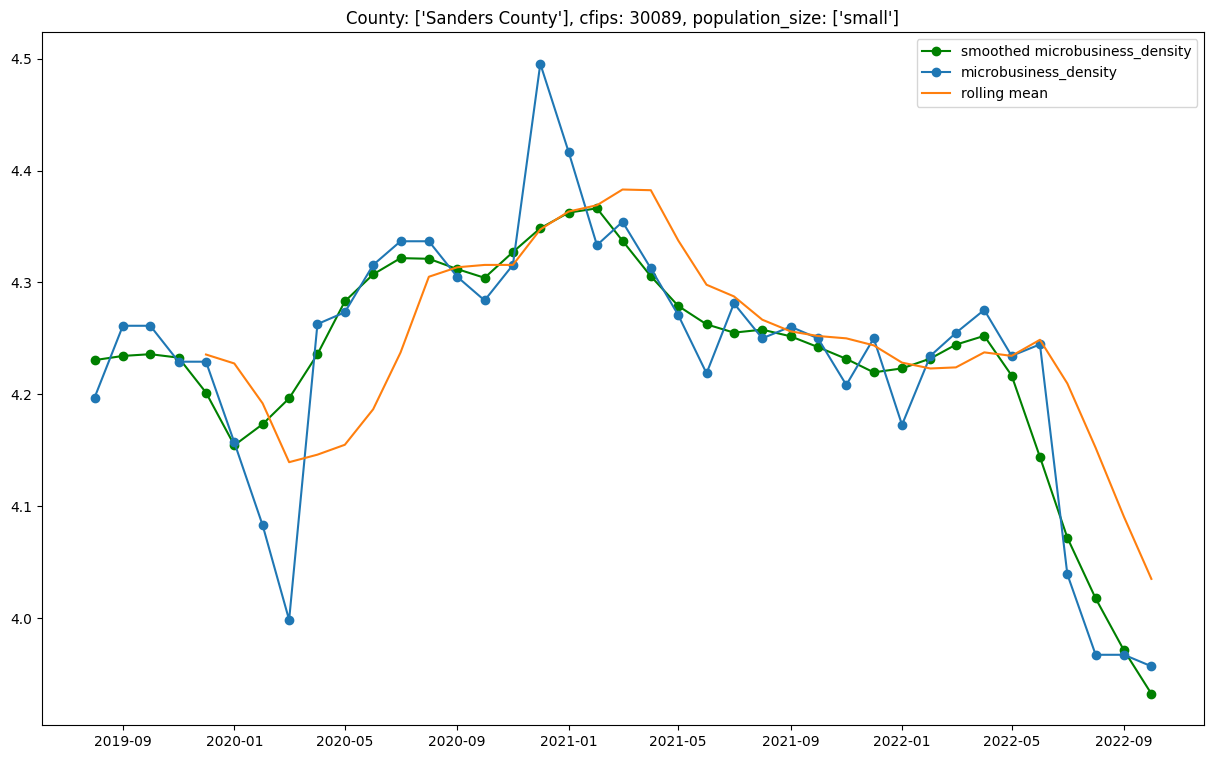

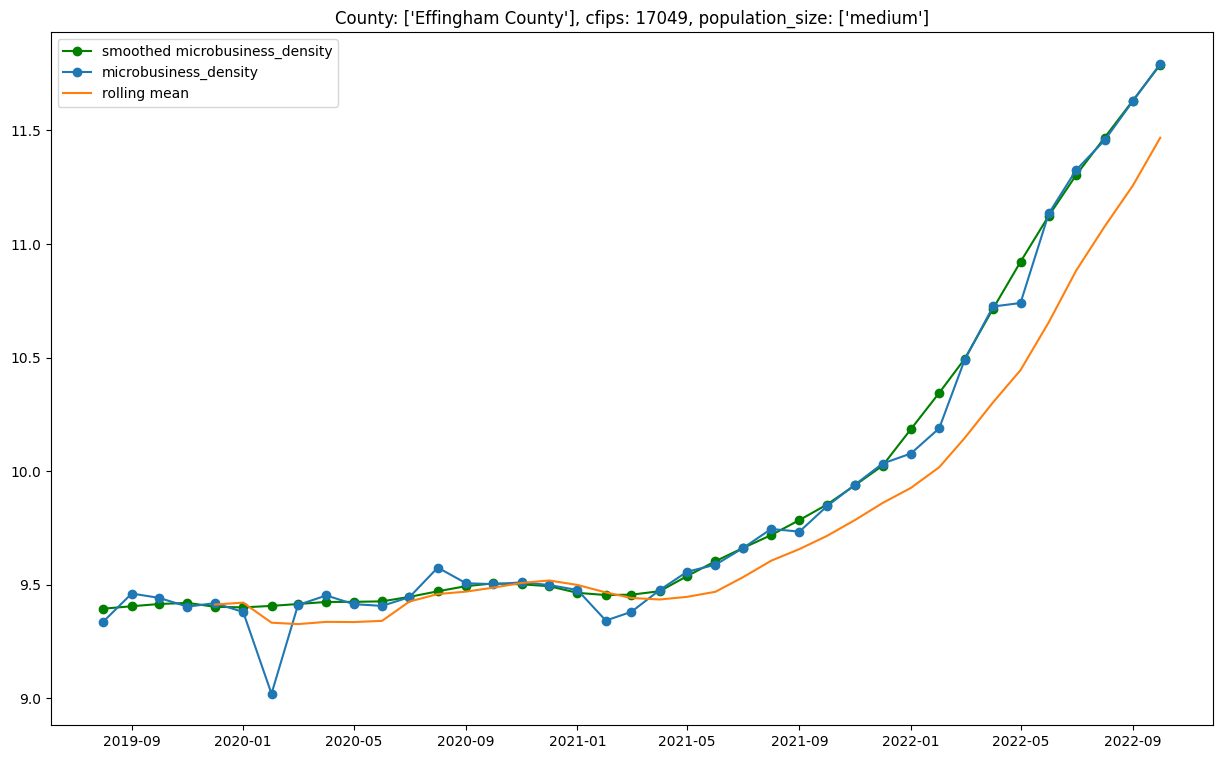

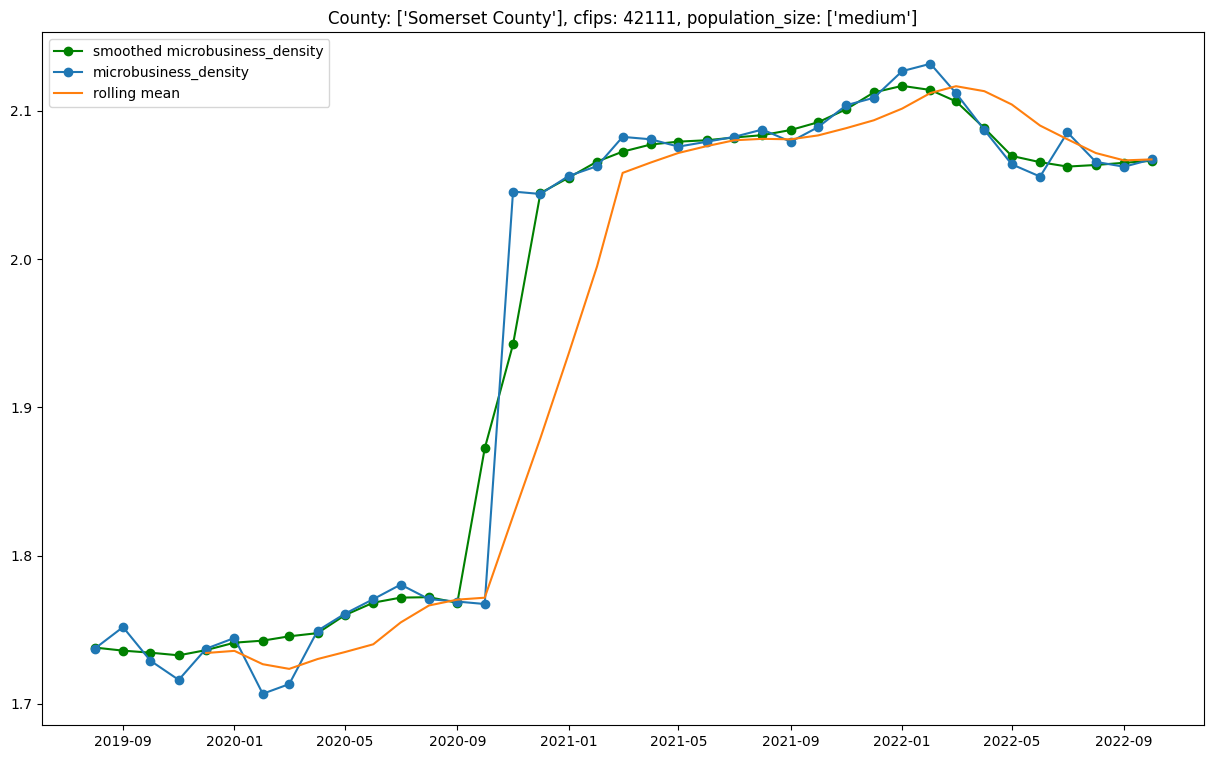

In [75]:
for i in range(3):
    lowess = sm.nonparametric.lowess
    # Choose a random county
    c = np.random.choice(cfips)
    temp_df = df[df["cfips"] == c]
    smoothed_density = lowess(
        temp_df["microbusiness_density"], temp_df["first_day_of_month"], frac=0.2
    )
    fig, ax = plt.subplots(1, 1, figsize=(15, 9))
    ax.plot(
        temp_df["first_day_of_month"],
        smoothed_density[:, 1],
        "-o",
        label="smoothed microbusiness_density",
        color="green",
    )
    ax.plot(
        temp_df["first_day_of_month"],
        temp_df["microbusiness_density"],
        "-o",
        label="microbusiness_density",
    )
    # plot also the rolling mean
    ax.plot(
        temp_df["first_day_of_month"],
        temp_df["microbusiness_density"].rolling(window=5).mean(),
        label="rolling mean",
    )
    plt.legend()
    plt.title(
        f"County: {temp_df['county'].unique()}, cfips: {c}, population_size: {temp_df['pop_group_2022'].unique()}"
    )
    plt.show()

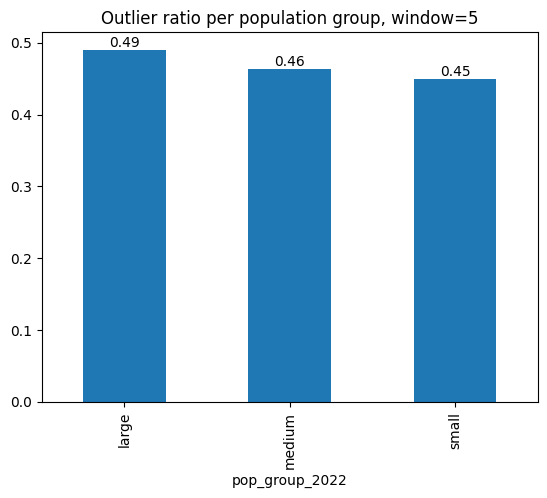

In [76]:
# Create a new column in the dataset that marks if that row has an outlier or not
df["outlier"] = (
    df["microbusiness_density"]
    < df["microbusiness_density"].rolling(window=5).mean()
    - df["microbusiness_density"].rolling(window=5).std()
) | (
    df["microbusiness_density"]
    > df["microbusiness_density"].rolling(window=5).mean()
    + df["microbusiness_density"].rolling(window=5).std()
)
# how many outliers per population group in average
df.groupby("pop_group_2022")["outlier"].mean().plot(kind="bar")
plt.title(f"Outlier ratio per population group, window=5")
plt.bar_label(plt.gca().containers[0], fmt="%.2f")
plt.show()

### Reflection
- From the above graph we actually see that there is no significant difference in outlier quantity per group size
- We could do some tests with predicting values for smoothened curves


## Investigate the jump in 2021/01

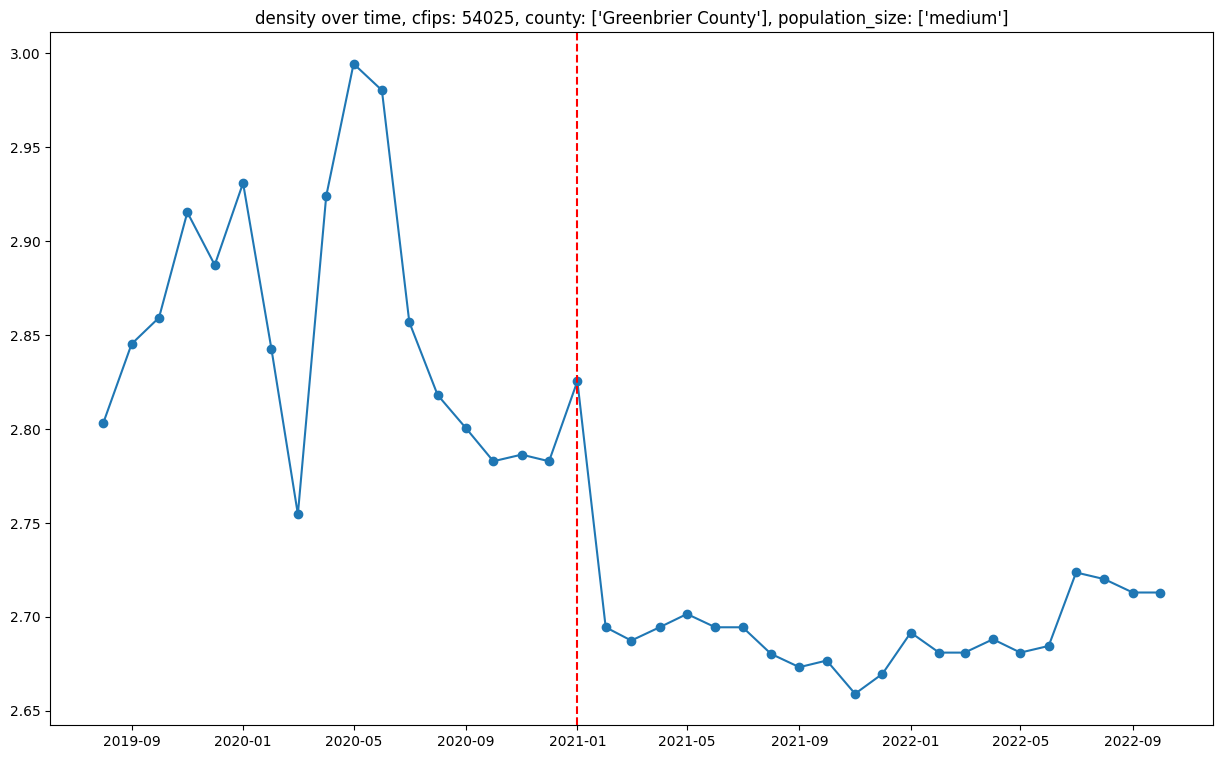

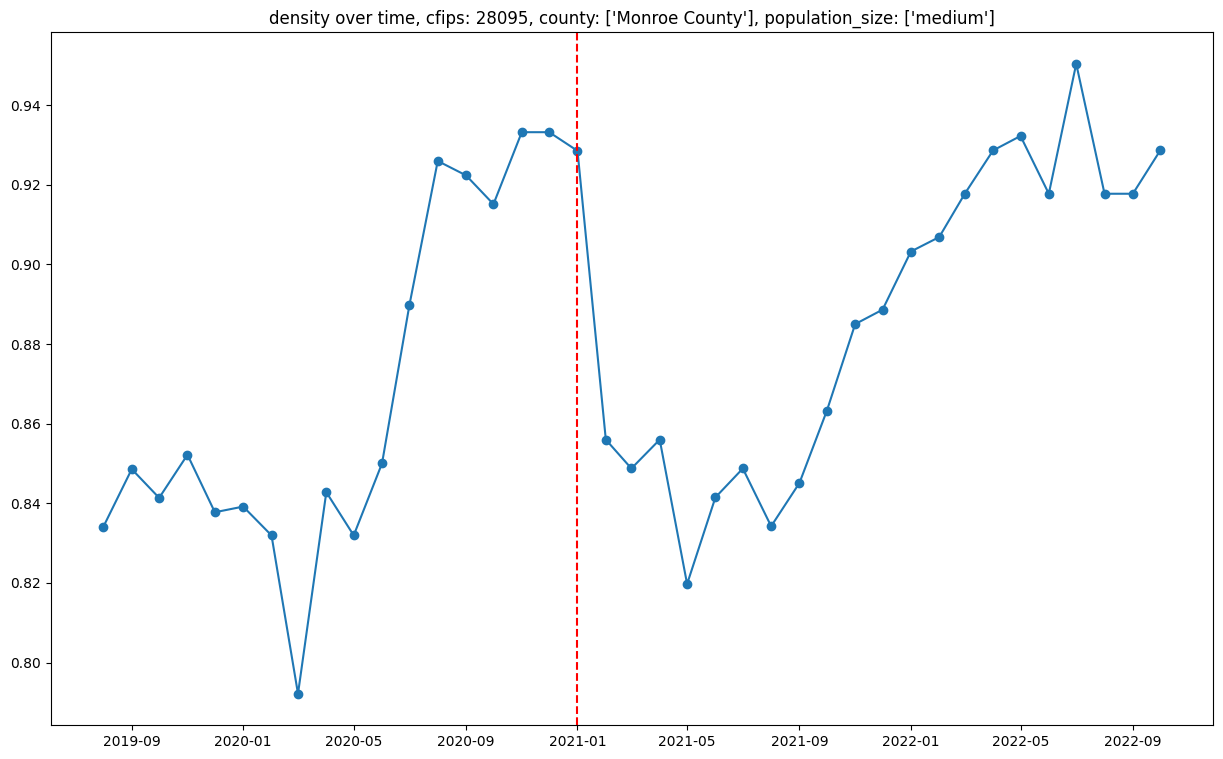

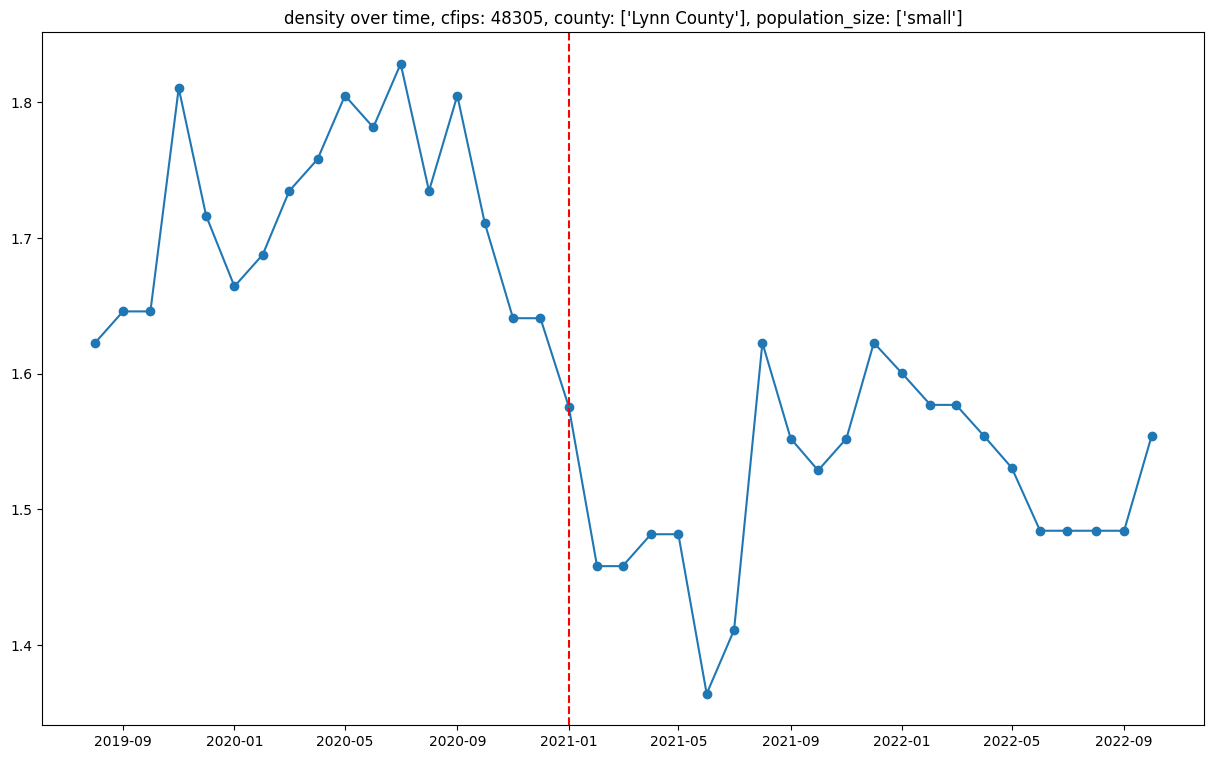

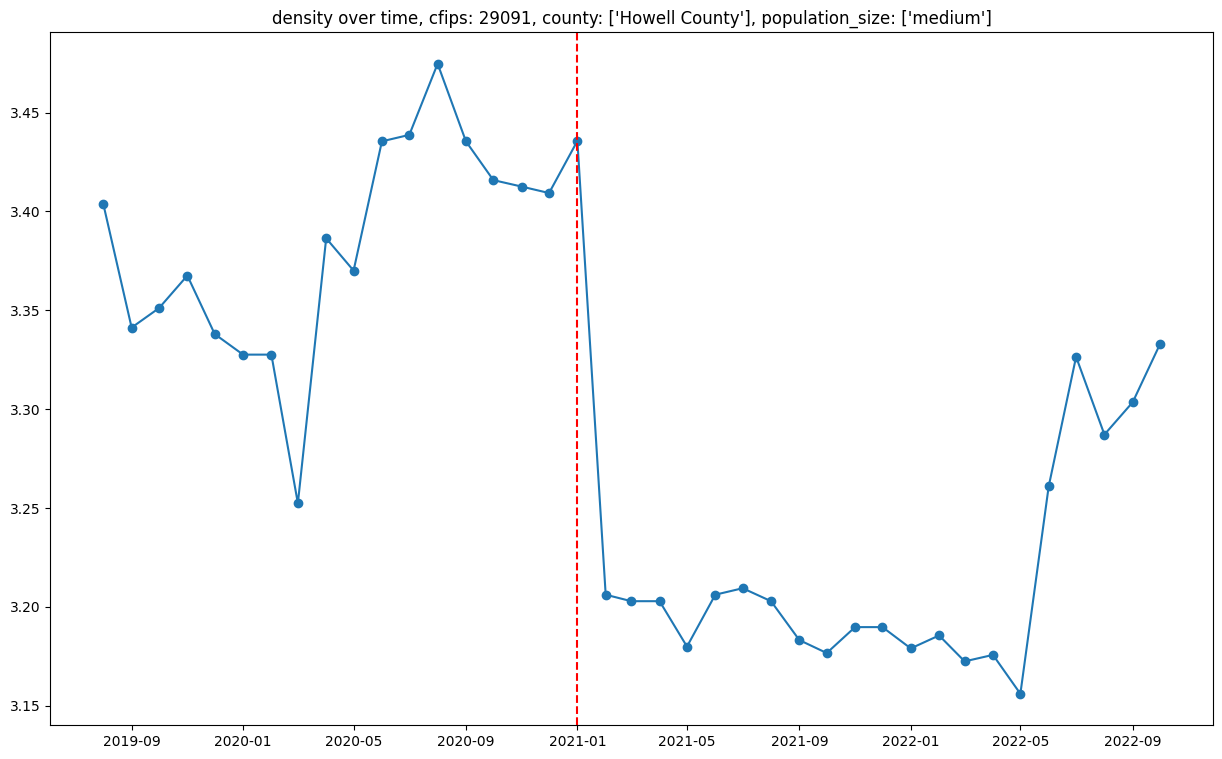

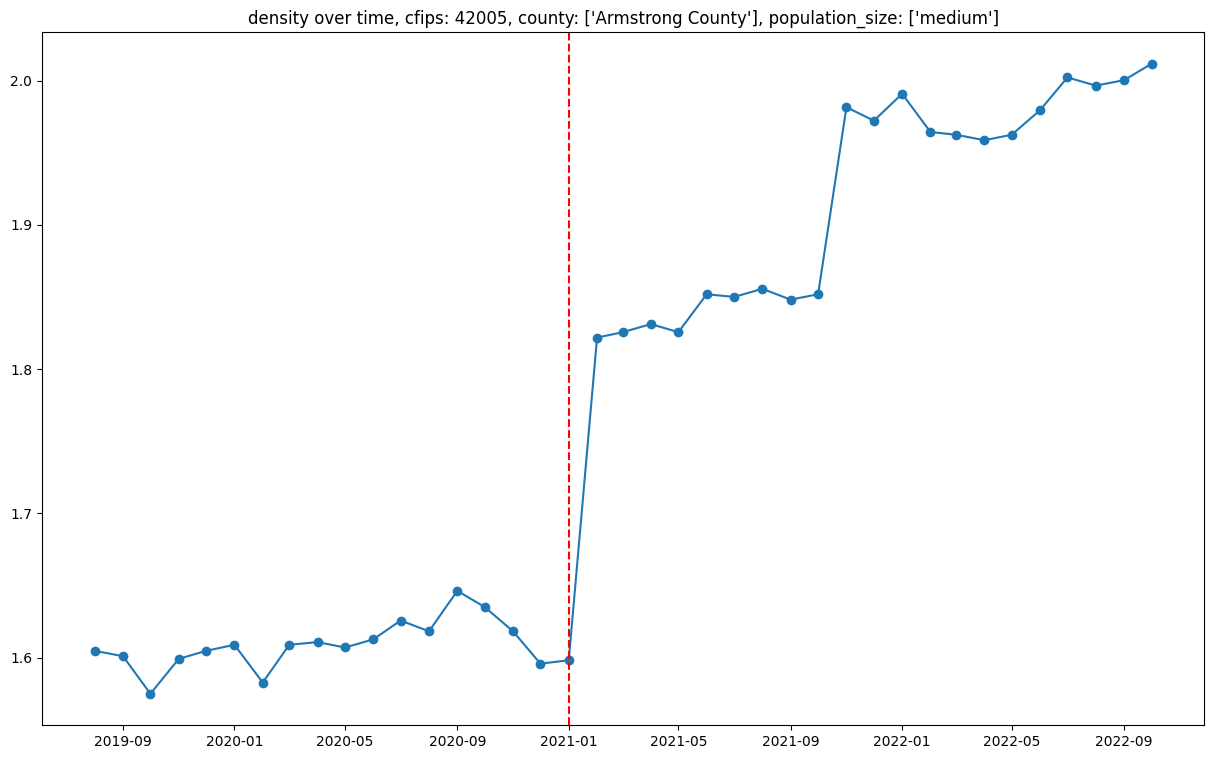

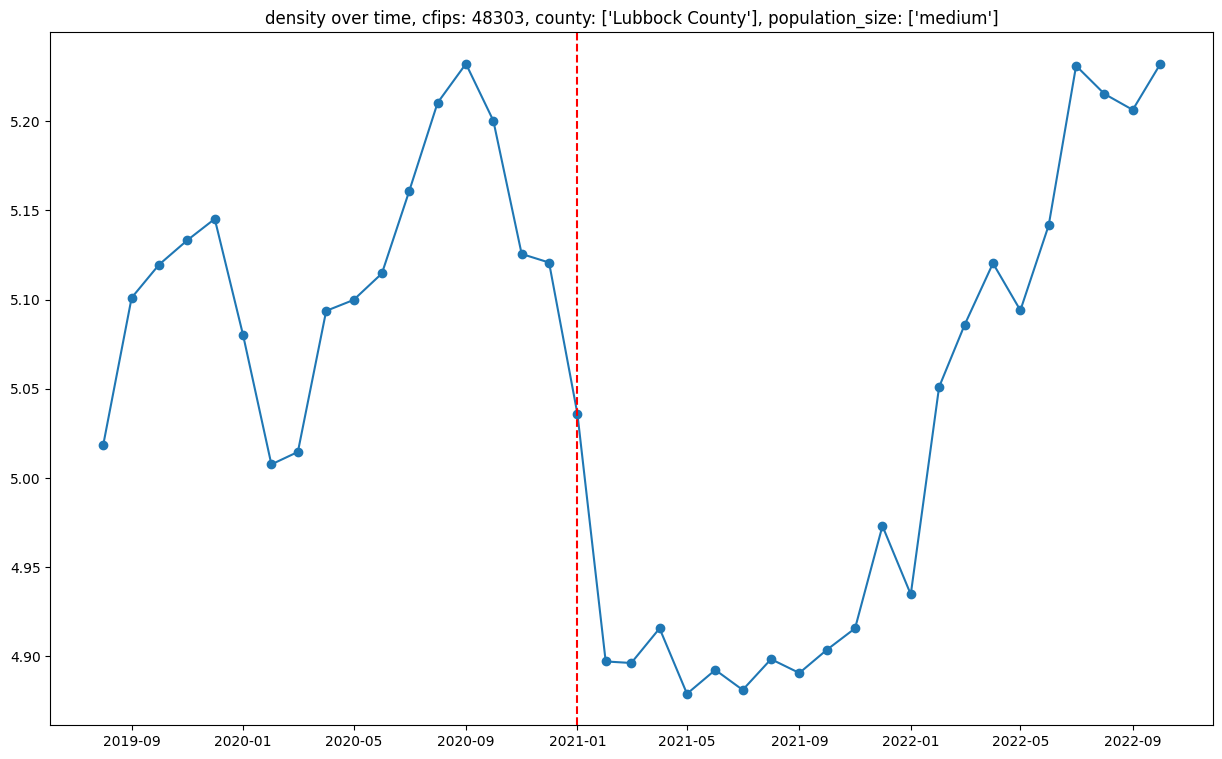

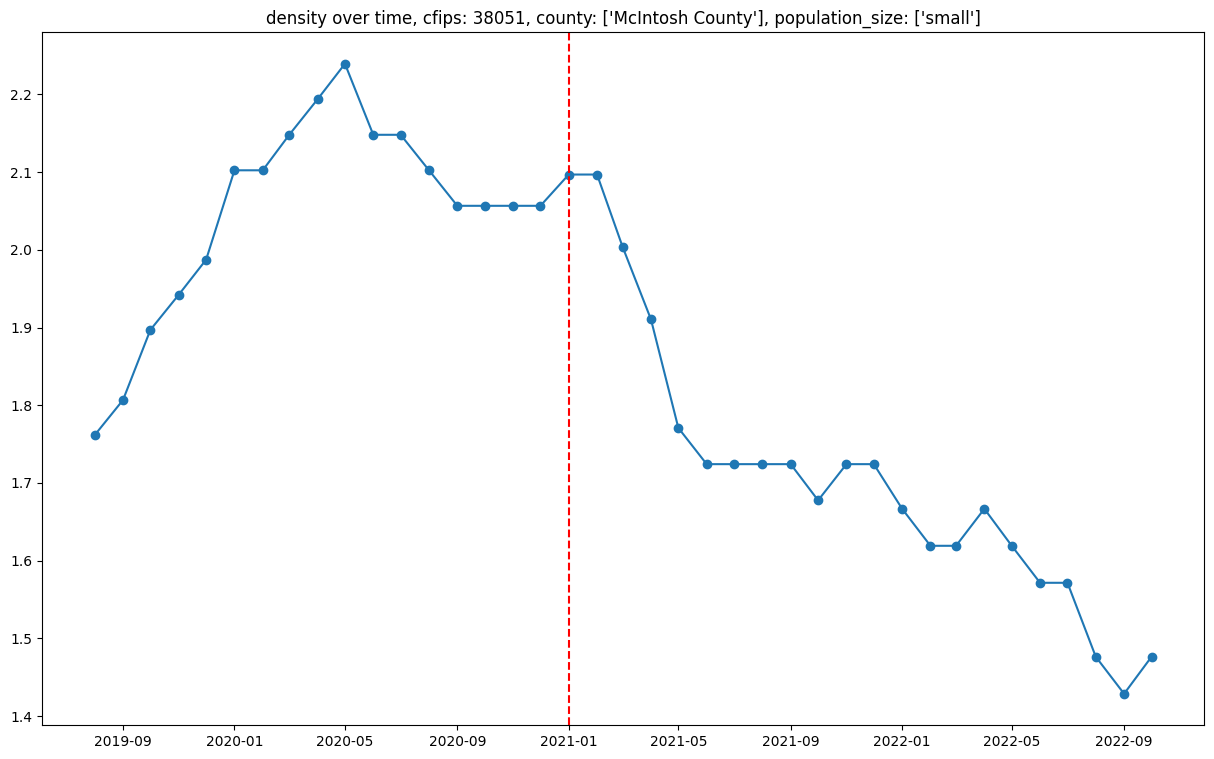

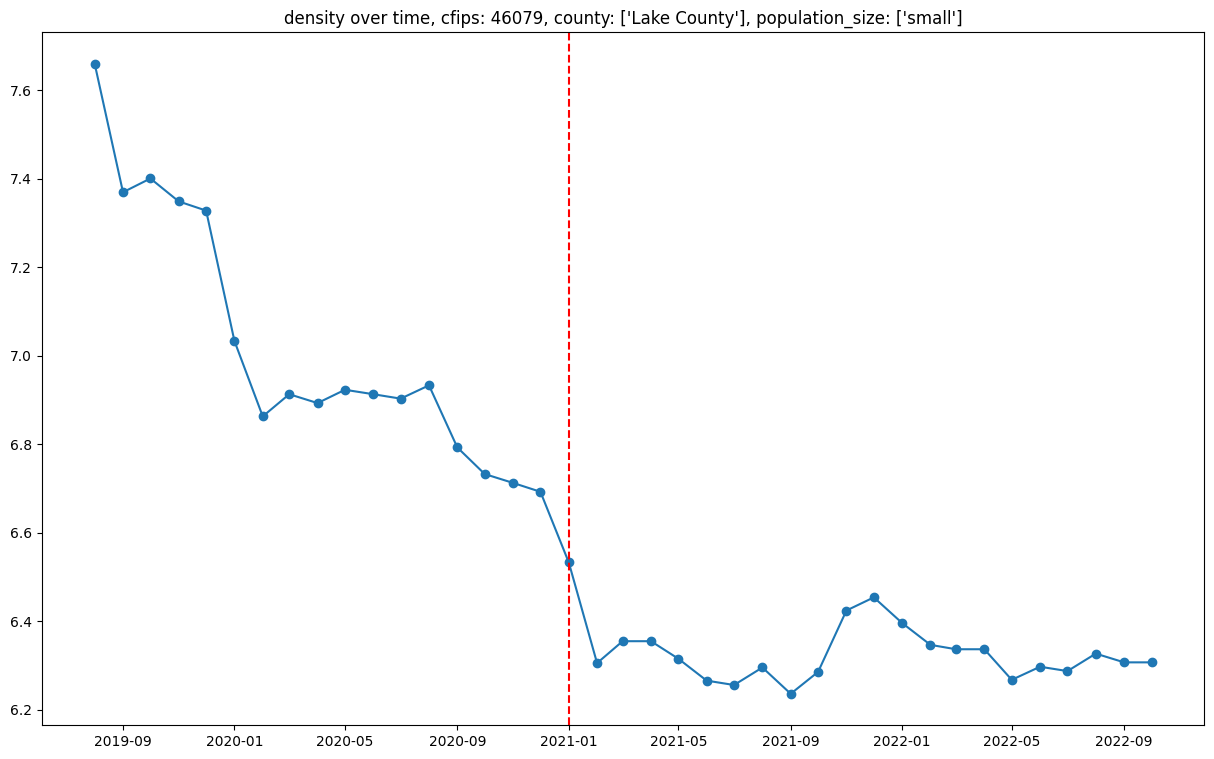

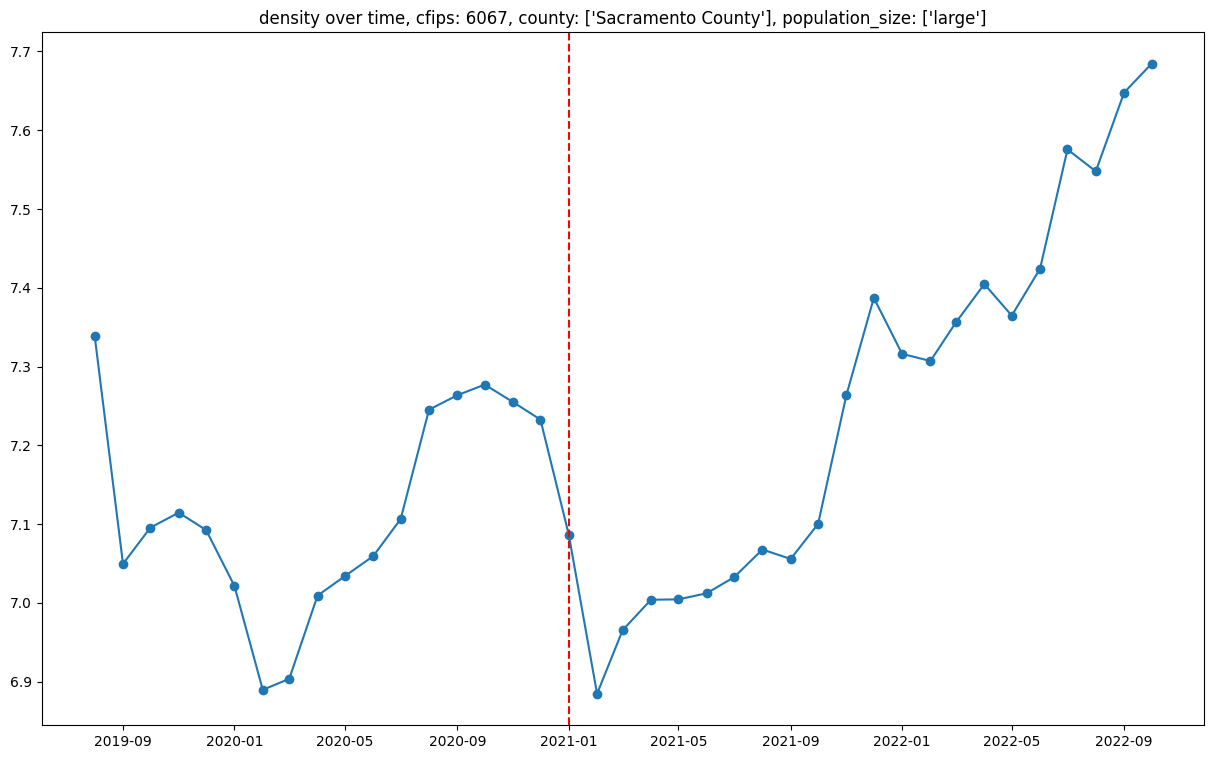

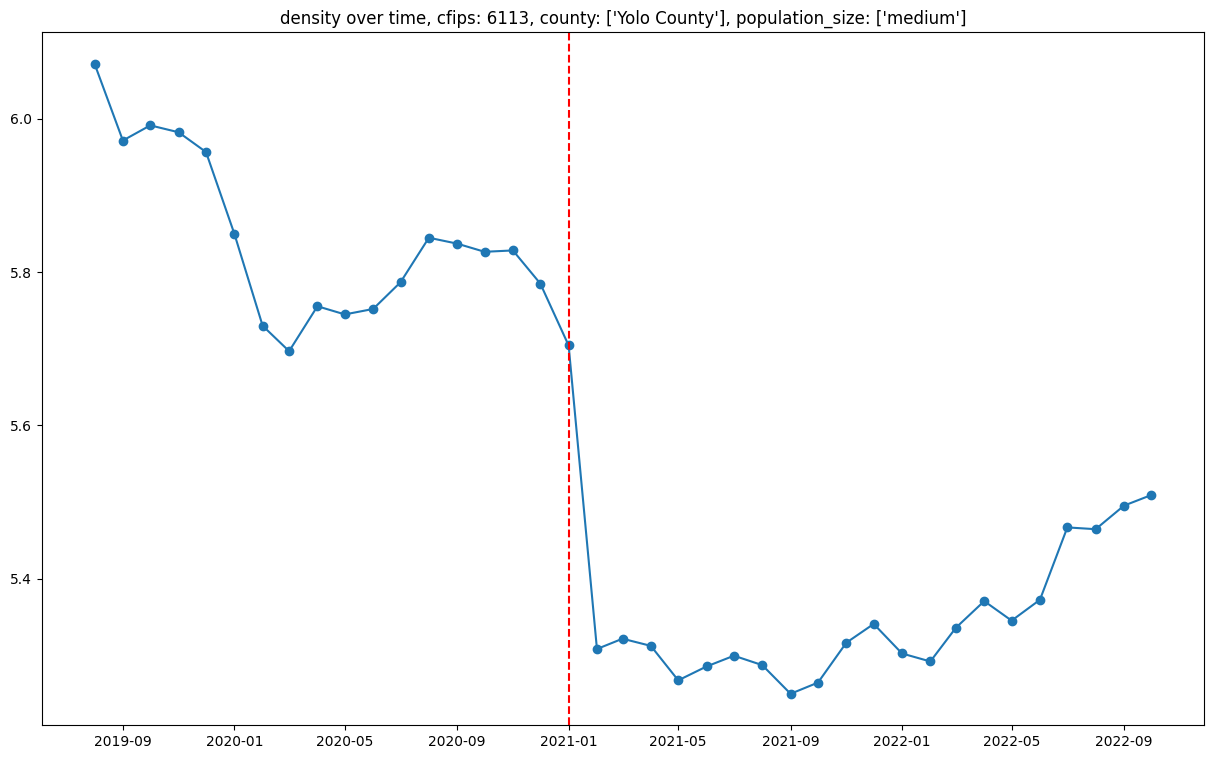

In [77]:
for i in range(10):
    lowess = sm.nonparametric.lowess
    # Choose a random county
    c = np.random.choice(cfips)
    temp_df = df[df["cfips"] == c]
    fig, ax = plt.subplots(1, 1, figsize=(15, 9))
    ax.plot(
        temp_df["first_day_of_month"],
        temp_df["microbusiness_density"],
        "-o",
        label="microbusiness_density",
    )
    # plot a vertical line for the date 2021-01-01
    ax.axvline(
        pd.to_datetime("2021-01-01"), color="red", linestyle="--", label="2021-01-01"
    )
    ax.set_title(
        f"density over time, cfips: {c}, county: {temp_df['county'].unique()}, population_size: {temp_df['pop_group_2022'].unique()}"
    )

### Study if the effect of this shift is significant across all samples

Lets look at it by calcuting the difference between consecutive dates

In [78]:
df["prev_microbusiness_density"] = df.groupby("cfips")["microbusiness_density"].shift(1)
df["difference"] = df["microbusiness_density"] - df["prev_microbusiness_density"]
df.loc[df.groupby("cfips").head(1).index, "difference"] = 0

In [79]:
df.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,STNAME,CTYNAME,POPESTIMATE2020,POPESTIMATE2021,year,population,quarter,pop_group_2020,pop_group_2022,outlier,prev_microbusiness_density,difference
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,Alabama,Autauga County,58877,59095,2019,41526,3,medium,medium,False,NaN,0.000000
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198,Alabama,Autauga County,58877,59095,2019,41526,3,medium,medium,False,3.007682,-0.122812
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269,Alabama,Autauga County,58877,59095,2019,41527,4,medium,medium,False,2.884870,0.170973
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243,Alabama,Autauga County,58877,59095,2019,41527,4,medium,medium,False,3.055843,-0.062610
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243,Alabama,Autauga County,58877,59095,2019,41527,4,medium,medium,False,2.993233,0.000000


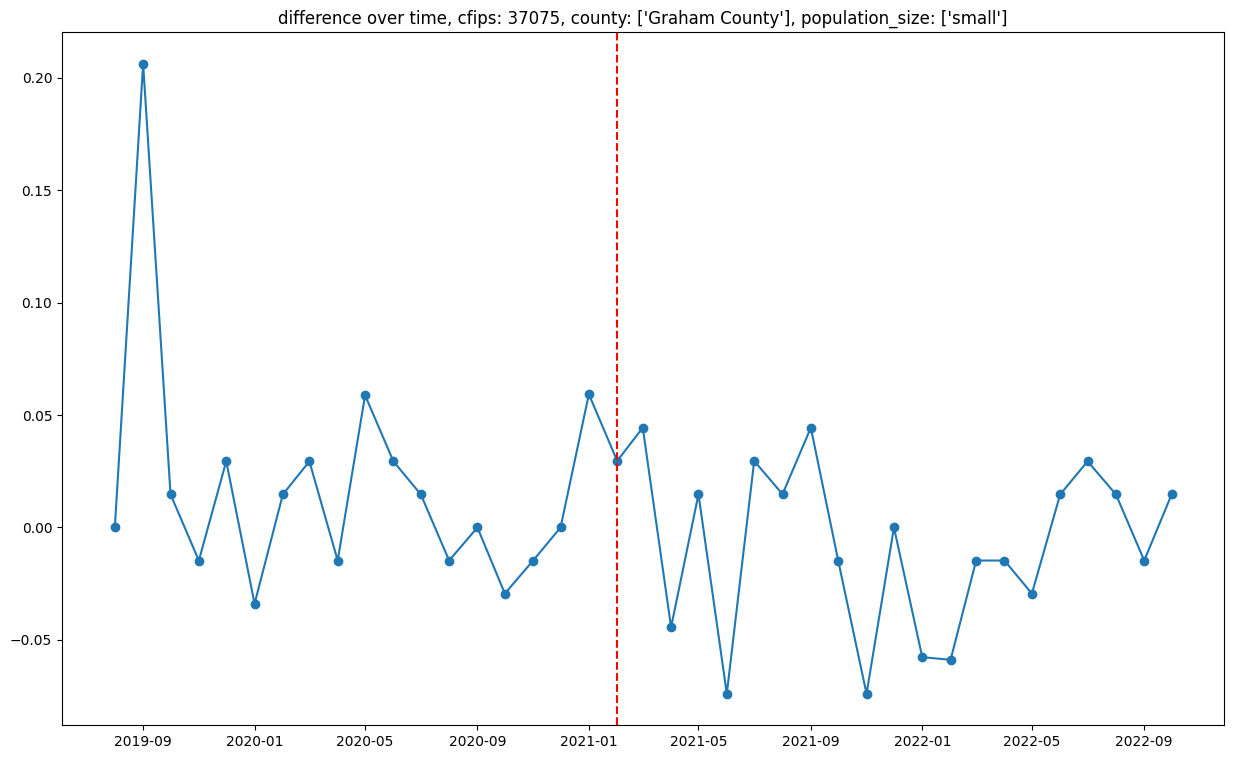

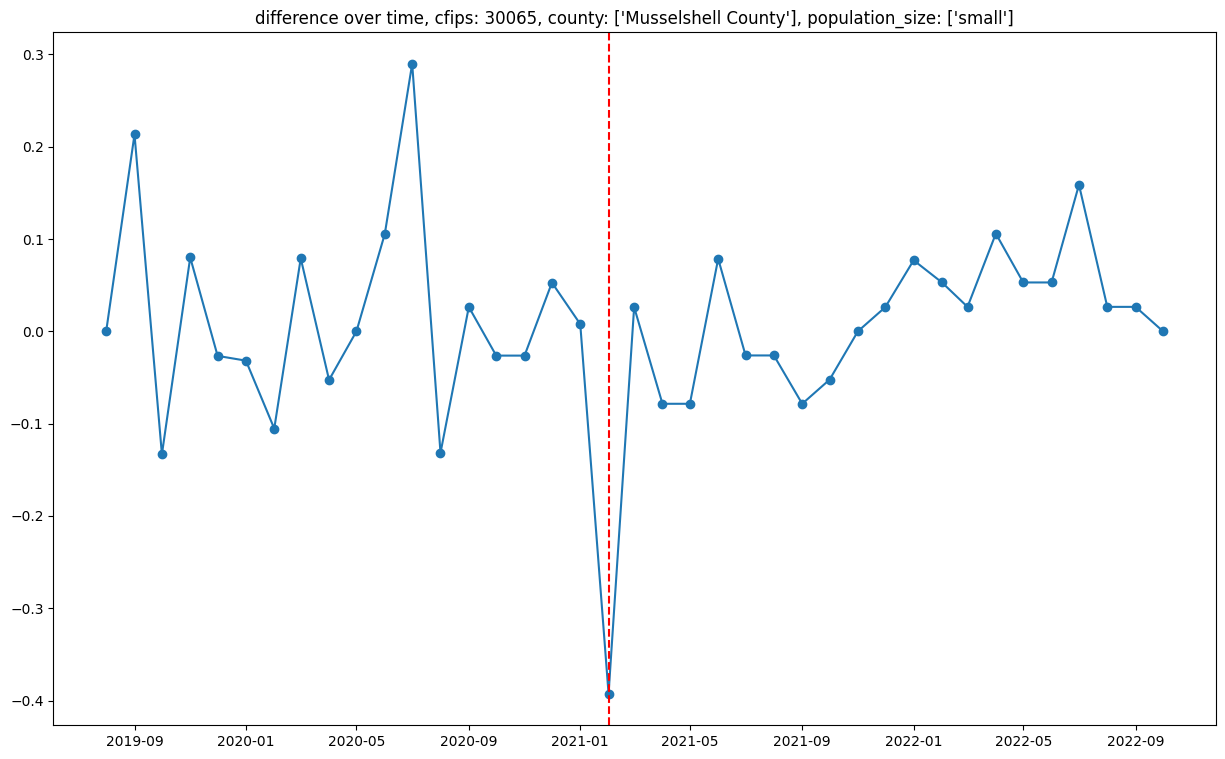

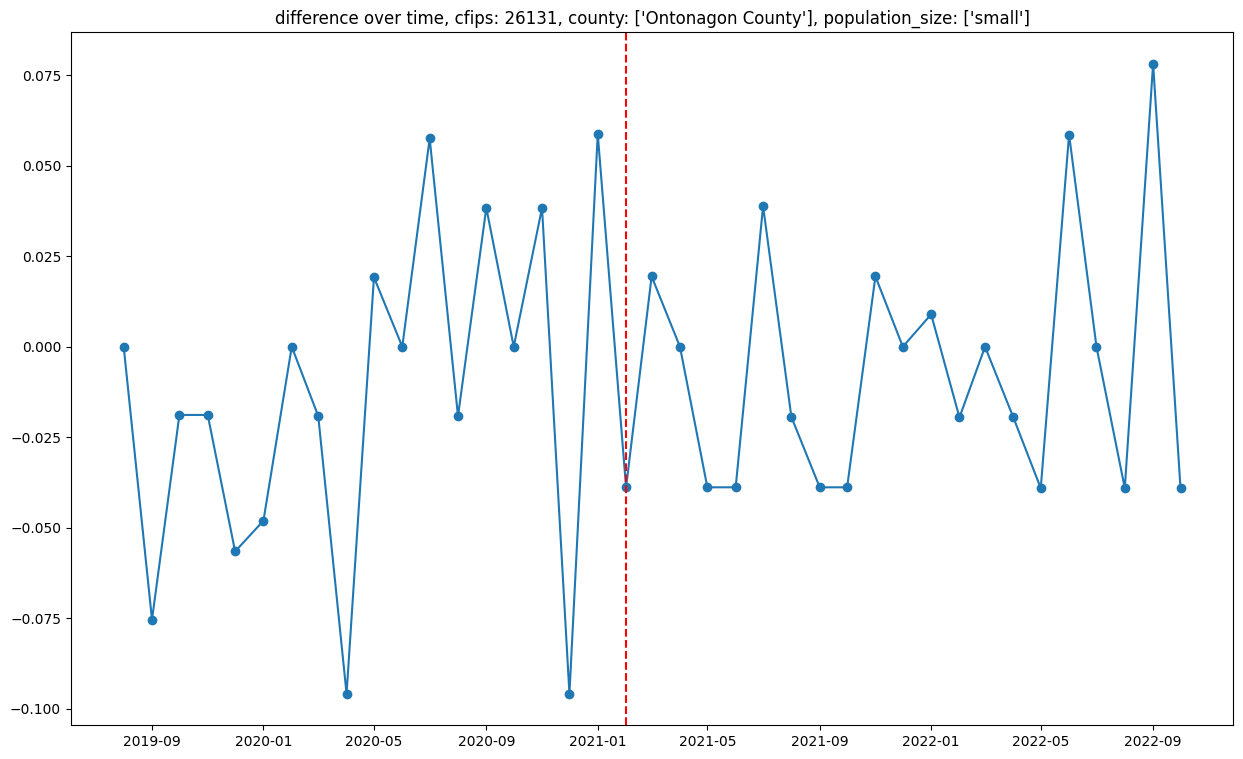

In [80]:
for i in range(3):
    c = np.random.choice(cfips)
    temp_df = df[df["cfips"] == c]
    fig, ax = plt.subplots(1, 1, figsize=(15, 9))
    ax.plot(
        temp_df["first_day_of_month"],
        temp_df["difference"],
        "-o",
        label="difference",
    )
    # plot a vertical line for the date 2021-02-01 we chose the next month because its where the difference is recorded
    ax.axvline(
        pd.to_datetime("2021-02-01"), color="red", linestyle="--", label="2021-01-01"
    )
    ax.set_title(
        f"difference over time, cfips: {c}, county: {temp_df['county'].unique()}, population_size: {temp_df['pop_group_2022'].unique()}"
    )

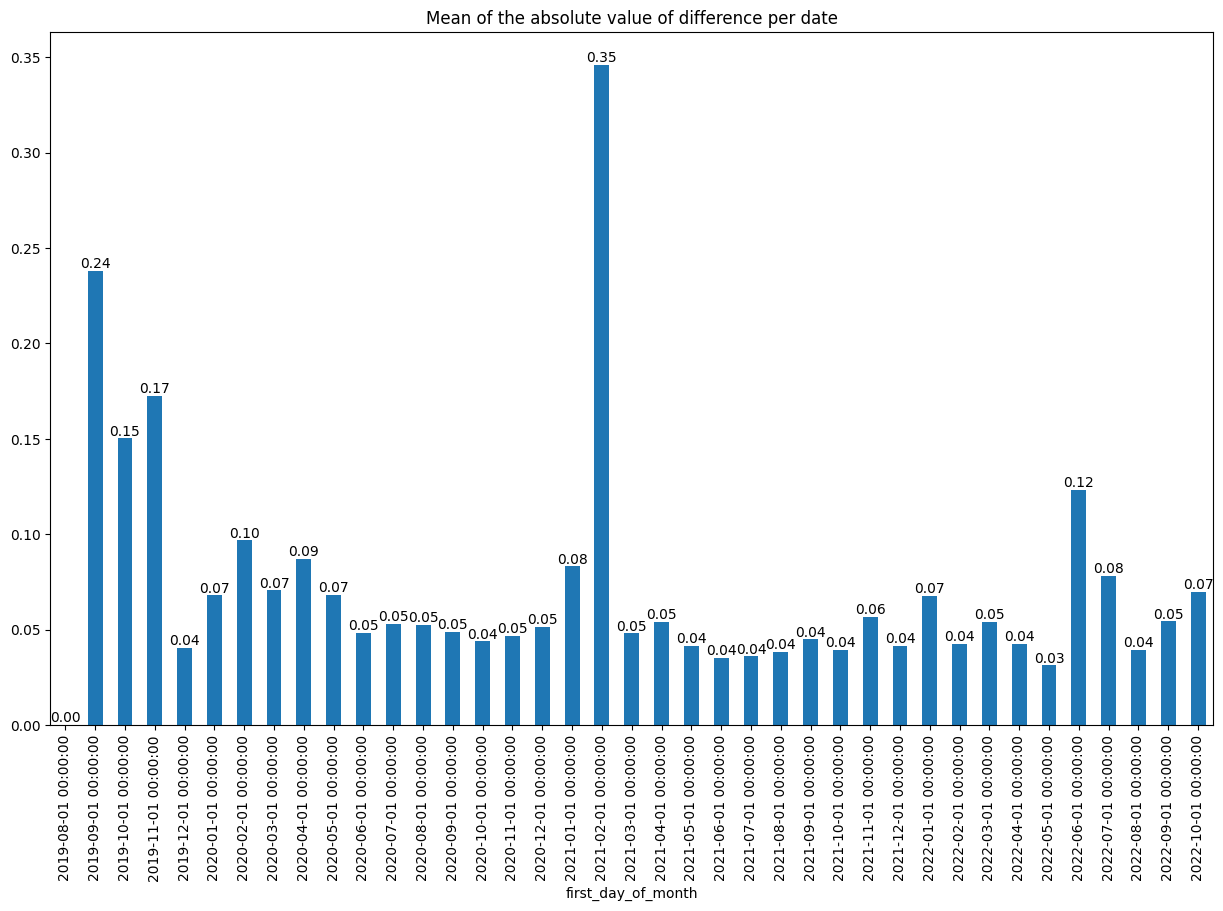

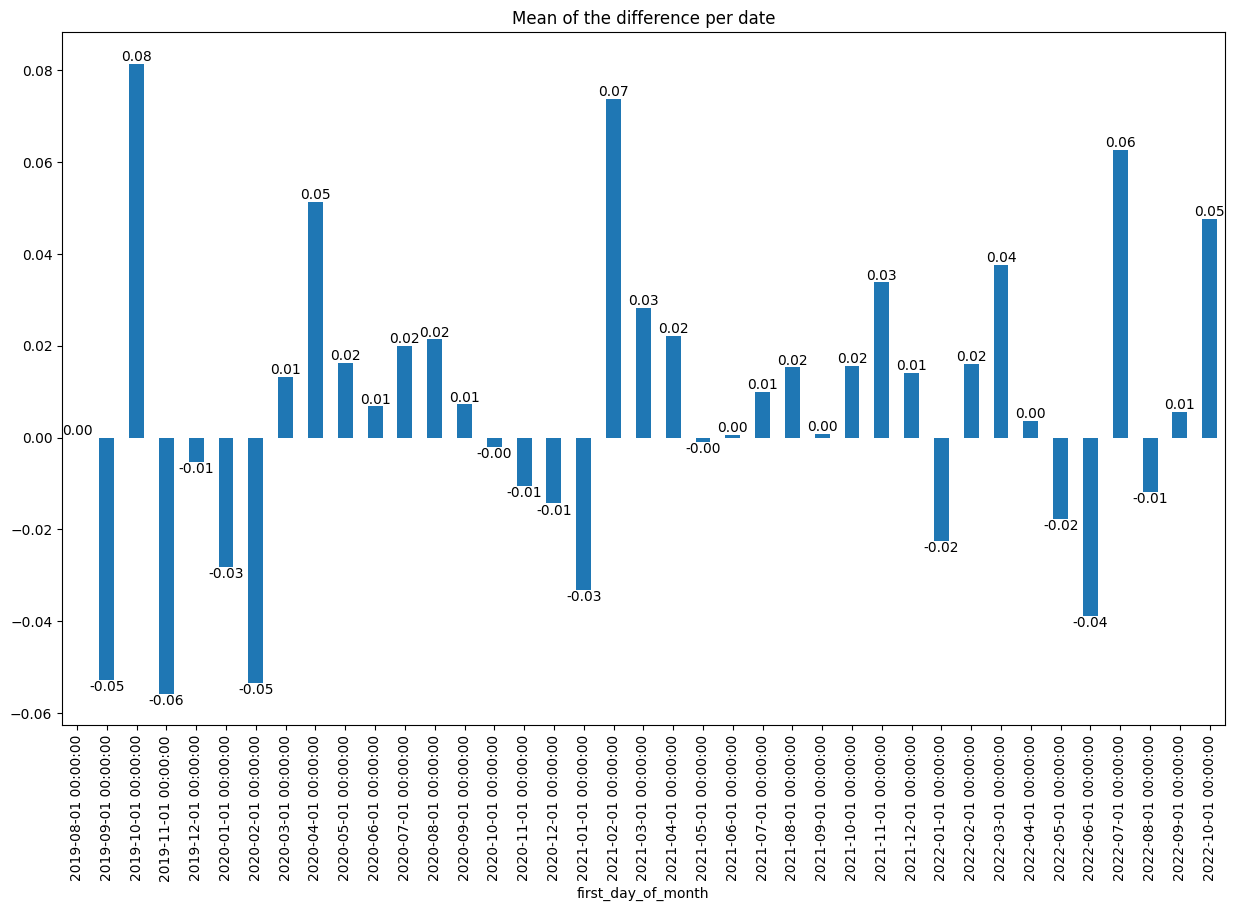

In [81]:
# plot the absolute value of the grouped difference by date'
df["difference_abs"] = df["difference"].abs()
df.groupby("first_day_of_month")["difference_abs"].mean().plot(
    kind="bar", figsize=(15, 9)
)
plt.title(f"Mean of the absolute value of difference per date")
plt.bar_label(plt.gca().containers[0], fmt="%.2f")
plt.show()
df.groupby("first_day_of_month")["difference"].mean().plot(kind="bar", figsize=(15, 9))
plt.title(f"Mean of the difference per date")
plt.bar_label(plt.gca().containers[0], fmt="%.2f")
plt.show()

### Is there a difference between the counties with a positive difference and the ones with a negative one?

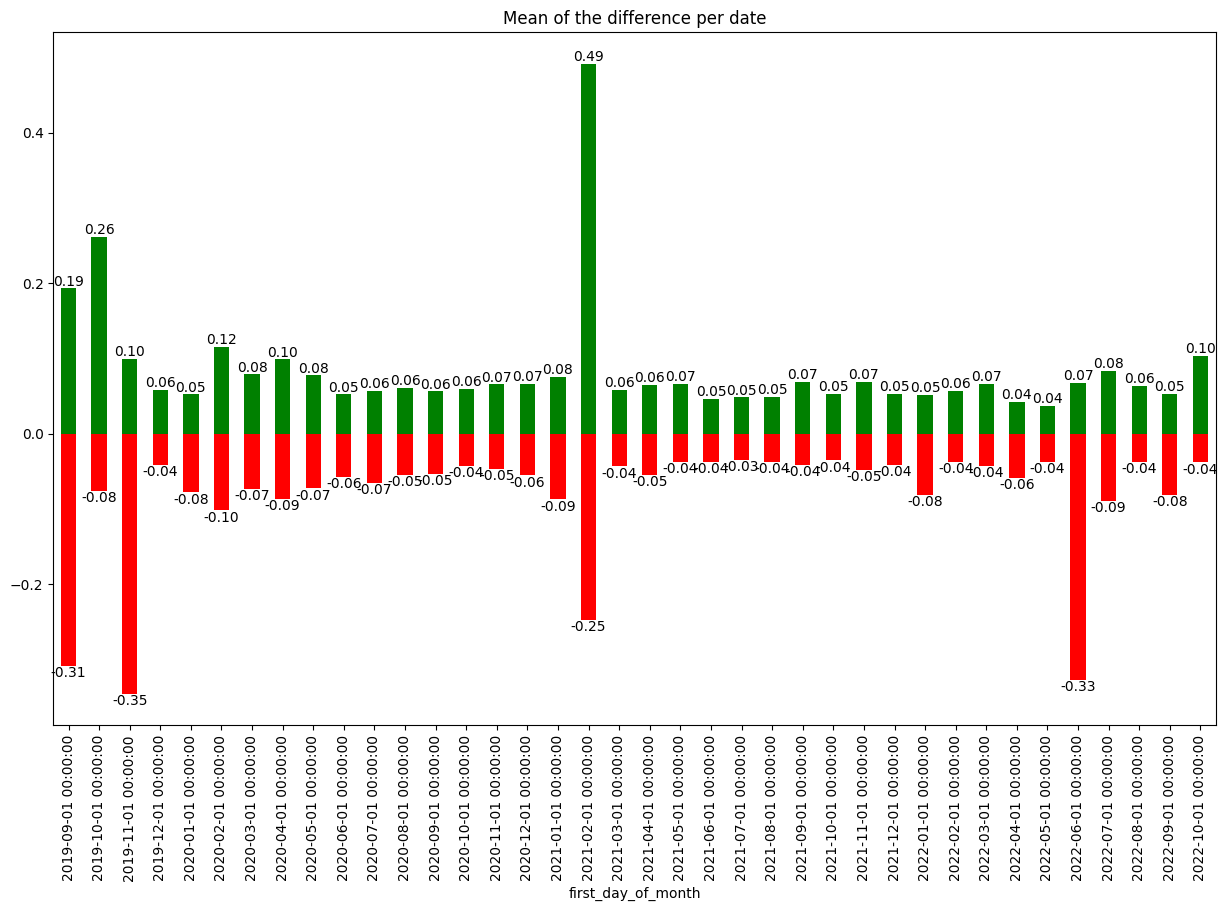

In [82]:
df_pos_diff = df[df["difference"] > 0]
df_neg_diff = df[df["difference"] < 0]

# Plot both of these in the se graph but with different colors
df_pos_diff.groupby("first_day_of_month")["difference"].mean().plot(
    kind="bar", figsize=(15, 9), color="green"
)

df_neg_diff.groupby("first_day_of_month")["difference"].mean().plot(
    kind="bar", figsize=(15, 9), color="red"
)
plt.title(f"Mean of the difference per date")

plt.bar_label(plt.gca().containers[0], fmt="%.2f")
plt.bar_label(plt.gca().containers[1], fmt="%.2f")

plt.show()

#### What pop group do the 20% largest differences belong to?

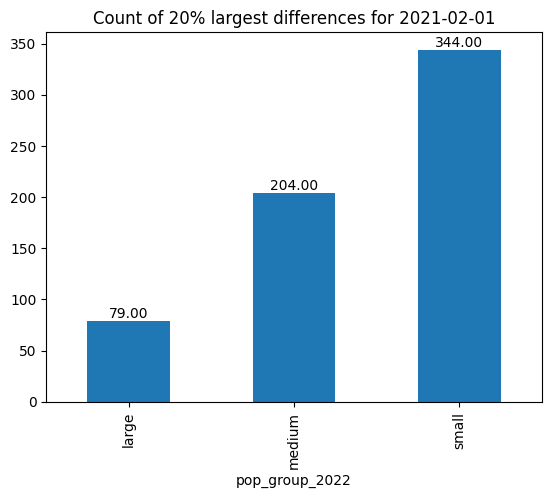

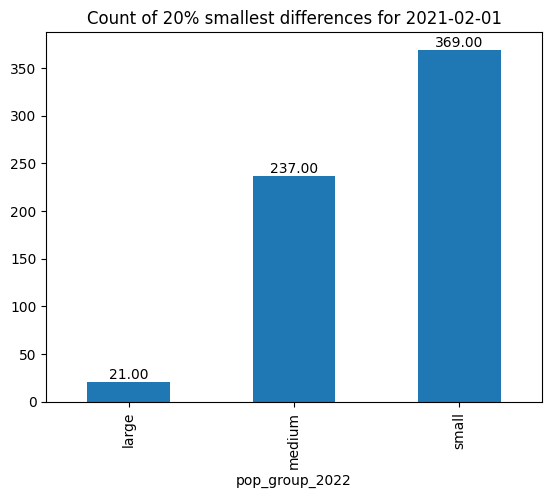

In [83]:
df_temp = df[df["first_day_of_month"] == "2021-02-01"]
df_temp.sort_values("difference_abs", ascending=False).head(
    int(len(df_temp) * 0.2)
).groupby("pop_group_2022")["difference_abs"].count().plot(kind="bar")
plt.title(f"Count of 20% largest differences for 2021-02-01")
plt.bar_label(plt.gca().containers[0], fmt="%.2f")
plt.show()
# just for safety lets also plot the distribution of the 20% smallest differences for that date
df_temp.sort_values("difference_abs", ascending=True).head(
    int(len(df_temp) * 0.2)
).groupby("pop_group_2022")["difference_abs"].count().plot(kind="bar")
plt.title(f"Count of 20% smallest differences for 2021-02-01")
plt.bar_label(plt.gca().containers[0], fmt="%.2f")
plt.show()

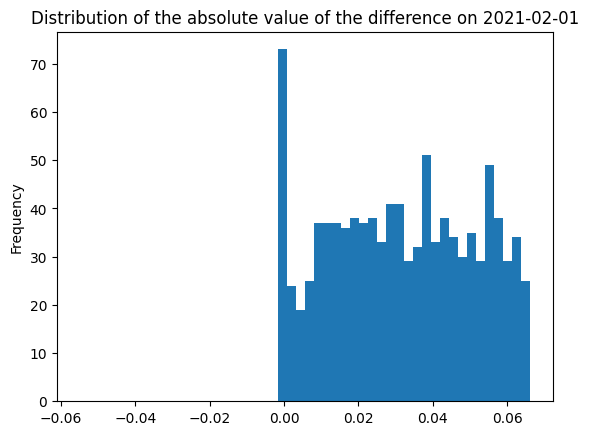

In [84]:
# box plot the distribution of the value of the difference on 2021-02-01 with bins for values close to 0
lower_limit = df["difference"].quantile(0.1)
upper_limit = df["difference"].quantile(0.9)
df_temp["difference_abs"].plot(kind="hist", bins=50, range=(lower_limit, upper_limit))

plt.title(f"Distribution of the absolute value of the difference on 2021-02-01")
plt.show()


# df_temp["difference_abs"].plot(kind="hist", bins=100)
# plt.title(f"Distribution of the absolute value of the difference on 2021-02-01")
# plt.show()

## Normalize the data before and after the 2021-01-01 and lets plot again to see the effect

In [87]:
# Normalize the data piecewise. First part is until 2021-01-01 where we normalize with the mean until then, second part is after 2021-01-01 where we normalize with the mean after that date
df["microbusiness_density_norm"] = df["microbusiness_density"]
df.loc[
    df["first_day_of_month"] <= "2021-01-01",
    "microbusiness_density_norm",
] = (
    df.loc[df["first_day_of_month"] <= "2021-01-01", "microbusiness_density_norm"]
    - df.loc[
        df["first_day_of_month"] <= "2021-01-01", "microbusiness_density_norm"
    ].mean()
) / df.loc[df["first_day_of_month"] <= "2021-01-01", "microbusiness_density_norm"].std()
df.loc[
    df["first_day_of_month"] > "2021-01-01",
    "microbusiness_density_norm",
] = (
    df.loc[df["first_day_of_month"] > "2021-01-01", "microbusiness_density_norm"]
    - df.loc[
        df["first_day_of_month"] > "2021-01-01", "microbusiness_density_norm"
    ].mean()
) / df.loc[df["first_day_of_month"] > "2021-01-01", "microbusiness_density_norm"].std()

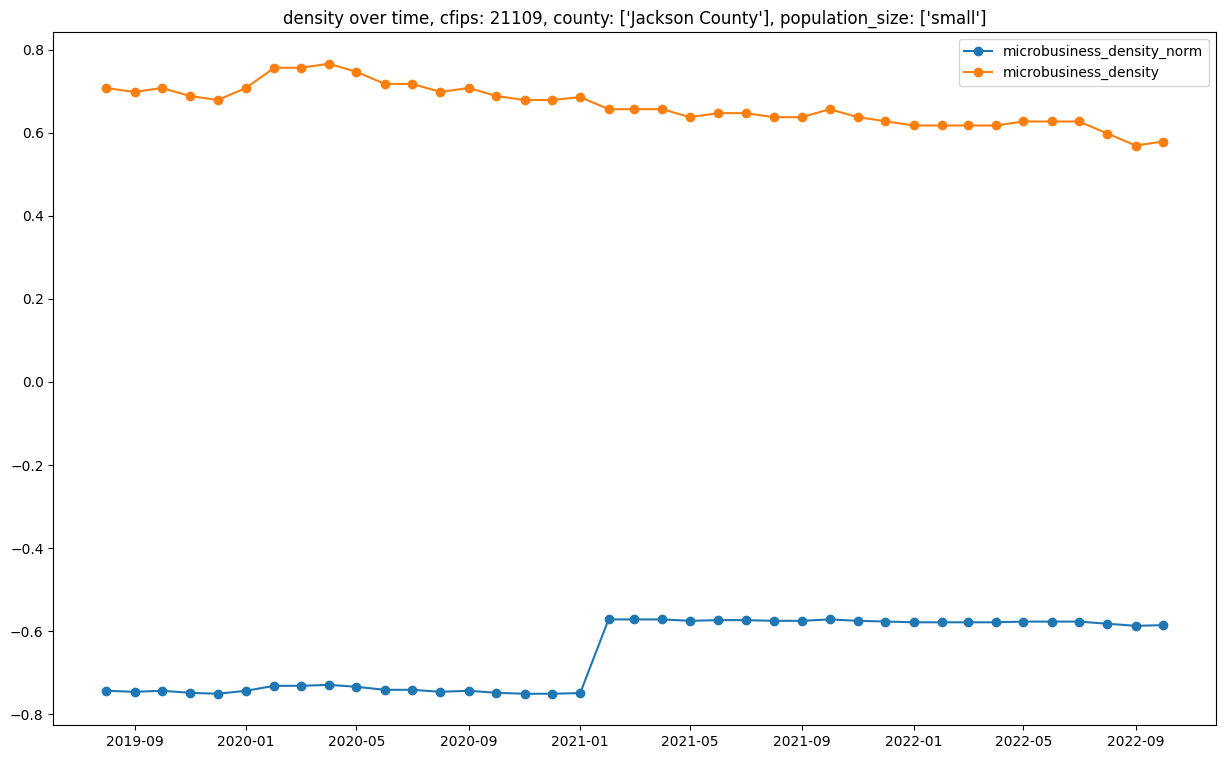

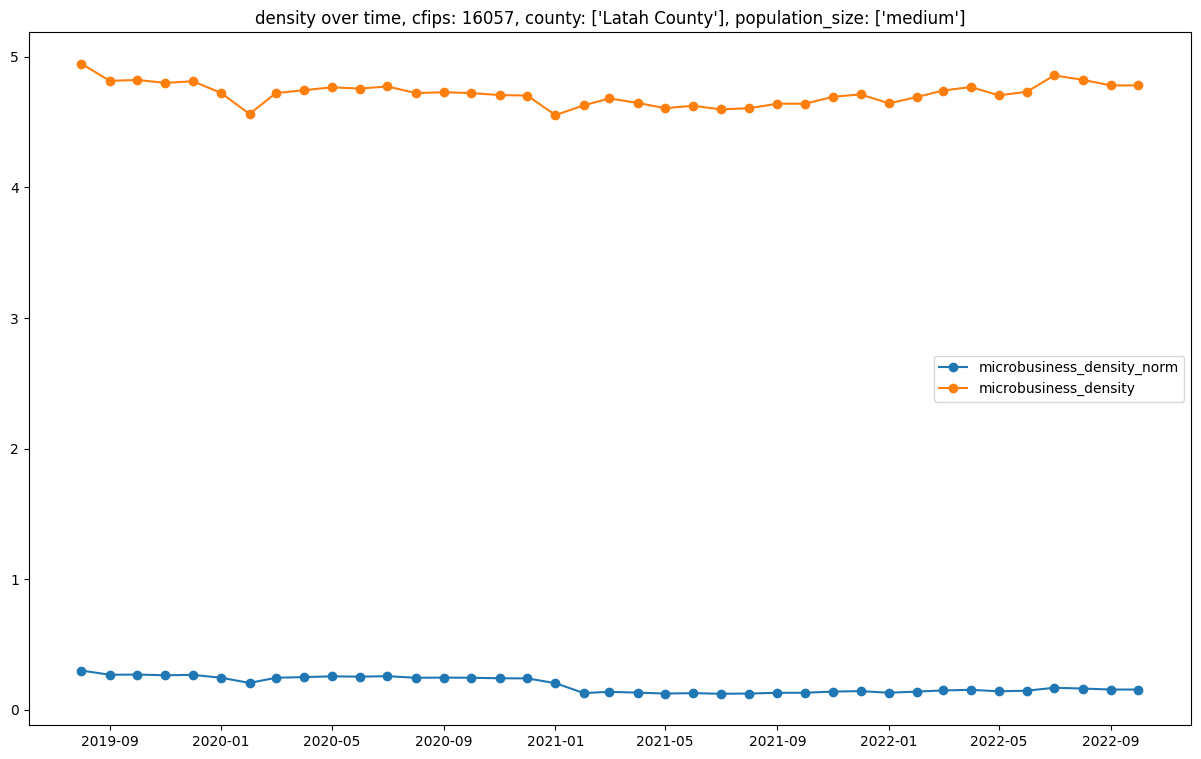

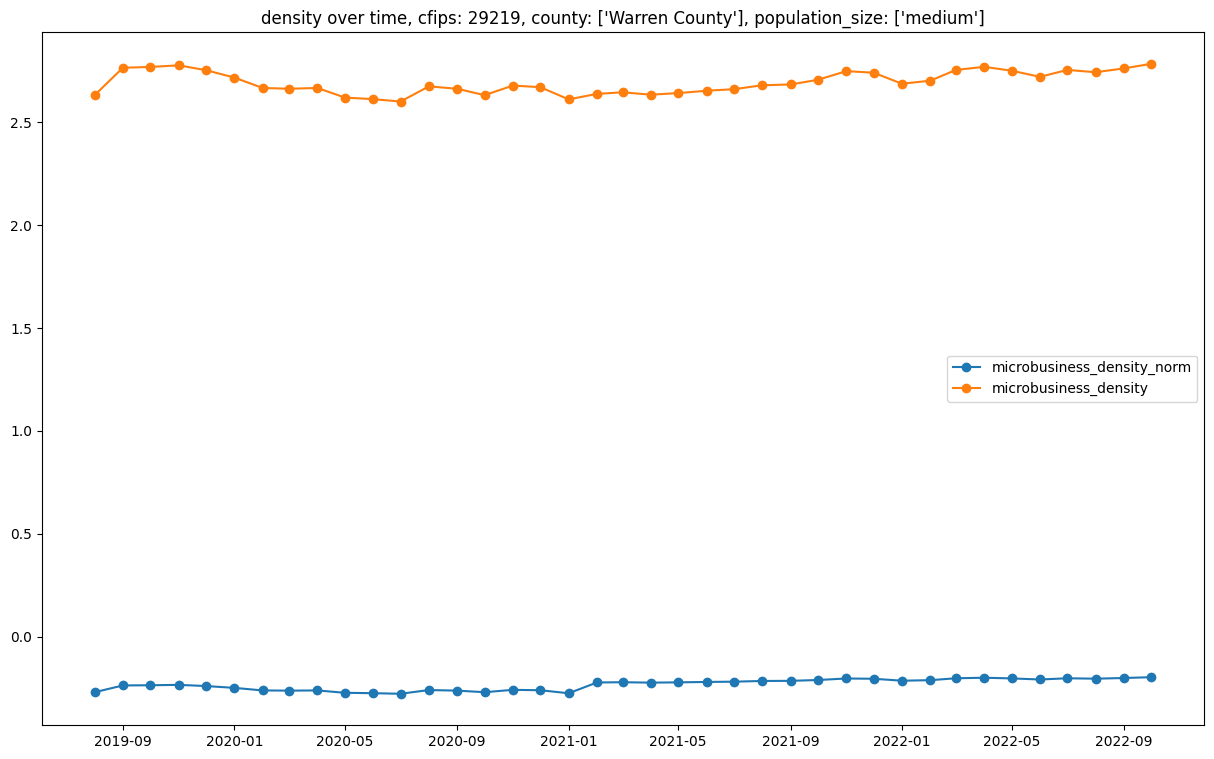

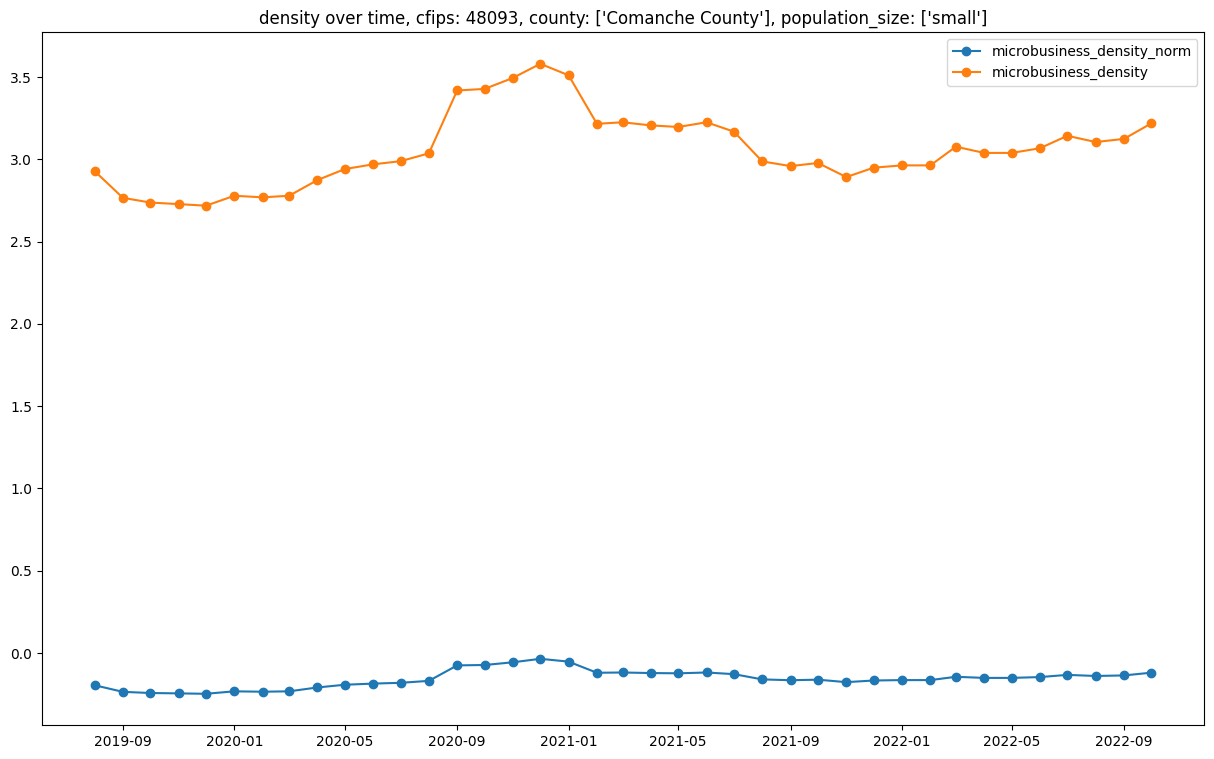

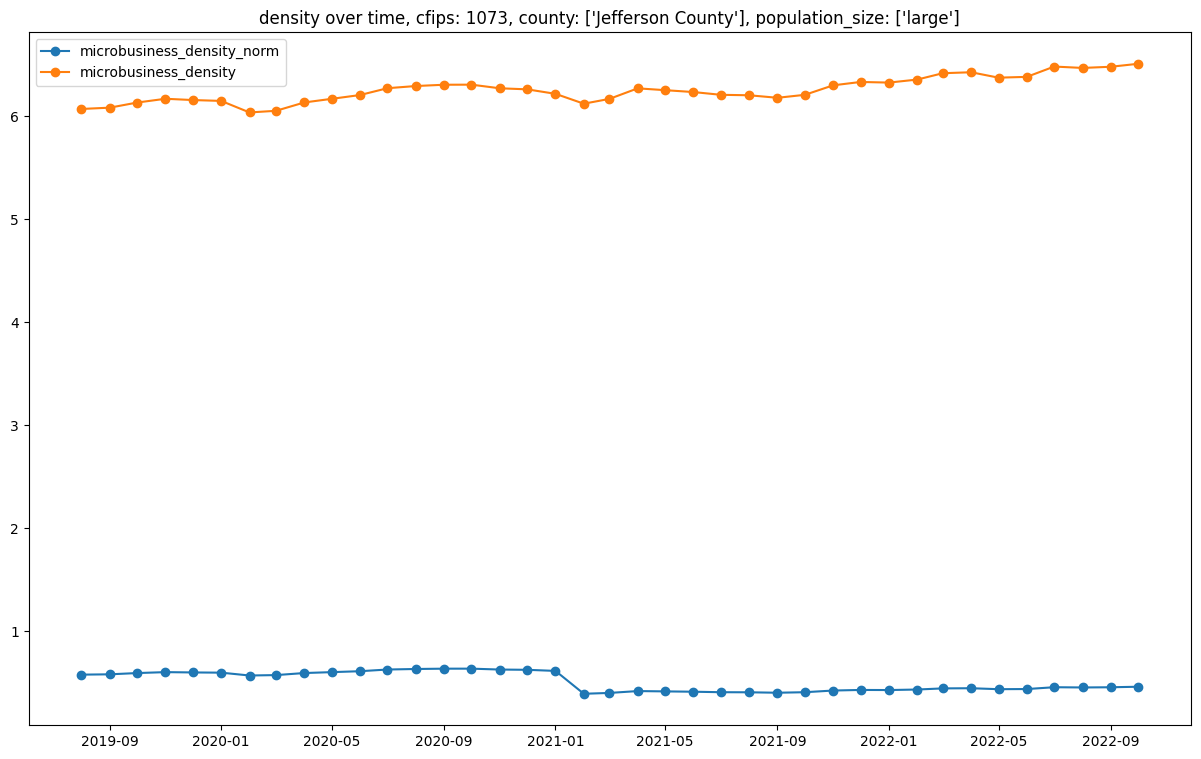

In [91]:
# plot some samples
for i in range(5):
    c = np.random.choice(cfips)
    temp_df = df[df["cfips"] == c]
    fig, ax = plt.subplots(1, 1, figsize=(15, 9))
    ax.plot(
        temp_df["first_day_of_month"],
        temp_df["microbusiness_density_norm"],
        "-o",
        label="microbusiness_density_norm",
    )
    ax.set_title(
        f"density over time, cfips: {c}, county: {temp_df['county'].unique()}, population_size: {temp_df['pop_group_2022'].unique()}"
    )
    # plot also a line for the density not normalized in the same graph
    ax.plot(
        temp_df["first_day_of_month"],
        temp_df["microbusiness_density"],
        "-o",
        label="microbusiness_density",
    )
    ax.legend()

### Reflection
Normalization helps a lot for the ones that had big jumps in this date, but otherwise builds a jump for the ones that didn´t. It might be interesting to stratify. Normalize only those that have big data jumps